In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
import scipy.stats as stats
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from itertools import combinations
from math import comb
from sklearn.ensemble import RandomForestClassifier

In [3]:
pd.set_option('mode.chained_assignment', None)

In [4]:
p279WordSimSeededDF_wabs_text = pd.read_csv("../data/P279_dataset/P279_ChildPar_19k_WEmbAndCosSim.csv")
p279Seeded_SiblingsDF3_wabs_text = pd.read_csv("../data/P279_dataset/P279_Siblings_19k_WEmbAndCosSim.csv")

In [5]:
p279WordSimSeededDF_wabs_text.head()

,node2,node1,id,node1_label,label,node2_label,sent,node1_emb,node2_emb,bert2SentSim,...,BERT_abstract_emb_right,BERT_abstract_firstSent_emb_right,textEmb_7props_left,textEmb_7props_right,textEmb_2props_left,textEmb_2props_right,textEmb_7props_cosSim,textEmb_2props_cosSim,BERT_abstract_cosSim,BERT_abstract_firstSent_cosSim
0,Q100171002,Q1503443,Q1503443-P279-Q100171002-8282ae74-0,secrecy,P279,concealment,secrecy is concealment,[ 4.83600467e-01 1.25958338e-01 1.84784138e+...,[ 3.61319035e-01 1.03393383e-01 1.50166345e+...,0.901134,...,NaN,NaN,"[0.87660795, 0.4991357, -0.39552155, 0.7046891...","[0.36156428, -0.015657336, -0.14483449, -0.253...","[0.79082793, 0.53679967, -0.3825465, 0.6778466...","[0.36156428, -0.015657336, -0.14483449, -0.253...",0.832602,0.823419,-1.000000,-1.000000
1,Q1002697,Q49850,Q49850-P279-Q1002697-0c52cf68-0,journal,P279,periodical,journal is periodical,[-5.87019742e-01 -3.76376987e-01 2.21003819e+...,[-2.23196611e-01 -4.97725368e-01 2.20271492e+...,0.863449,...,"[-0.28667202591896057, -0.4099476933479309, 0....","[-0.25435054302215576, -0.92085862159729, 1.68...","[1.256428, 0.3254261, -0.26960722, 0.101883665...","[0.92698413, 0.32396156, -0.7647308, 0.6973268...","[1.256428, 0.3254261, -0.26960722, 0.101883665...","[1.0344226, 0.39984593, -0.76180136, 0.8256311...",0.742638,0.734428,-1.000000,-1.000000
2,Q101998,Q4421,Q4421-P279-Q101998-d0983886-0,forest,P279,biome,forest is biome,[-4.80742343e-02 -4.51617390e-01 1.48896754e+...,[ 5.09670794e-01 -4.42380428e-01 1.53245163e+...,0.507148,...,"[0.12320789694786072, 0.2723684310913086, 0.05...","[0.5991100072860718, 0.15195603668689728, 0.59...","[0.8141036, 0.14491142, -0.59703183, 0.335001,...","[-0.16750671, -0.17960861, -0.58211946, -0.687...","[0.91628444, 0.104261845, -0.49683735, 0.21296...","[-0.13534825, -0.23398273, -0.5165668, -0.7297...",0.647031,0.707611,0.508060,0.455747
3,Q102165,Q2294,Q2294-P279-Q102165-0893a180-0,proton,P279,nucleon,proton is nucleon,[-3.39149237e-01 2.01575115e-01 1.08608294e+...,[-6.87960759e-02 -1.65659860e-01 9.53789592e-...,0.798707,...,"[0.17410606145858765, 0.6839145421981812, -0.8...","[-0.04499293863773346, 0.6921464204788208, -0....","[0.469377, 0.7162001, -0.36740896, 0.76742333,...","[-0.11307852, 0.65730673, -0.13959256, 1.46633...","[0.4080446, 0.7498908, -0.2665757, 0.74437106,...","[-0.11307852, 0.65730673, -0.13959256, 1.46633...",0.836531,0.847591,0.855959,0.770030
4,Q102205,Q11435,Q11435-P279-Q102205-7b448d05-0,liquid,P279,fluid,liquid is fluid,[-5.40423356e-02 -1.01775277e+00 2.21057415e+...,[ 1.30038410e-01 -8.53226840e-01 2.37821031e+...,0.934246,...,"[0.4393930733203888, 0.7159943580627441, 0.647...","[0.5091343522071838, -0.05845202878117561, 1.0...","[-0.19995248, 0.65605164, -0.14234662, 0.43931...","[0.4293771, 1.1976917, 0.04422909, 0.5975481, ...","[-0.45549682, 0.73478854, -0.1980287, 0.436793...","[0.33631665, 1.1661042, 0.13744242, 0.6776439,...",0.765589,0.780342,0.752693,0.515319


In [6]:
p279WordSimSeededDF_wabs_text.bert2SentSim.describe()

count    19454.000000
mean         0.602876
std          0.146181
min          0.064503
25%          0.493110
50%          0.597949
75%          0.711631
max          1.000000
Name: bert2SentSim, dtype: float64

In [6]:
p279WordSimSeededDF_wabs_text.columns

Index(['node2', 'node1', 'id', 'node1_label', 'label', 'node2_label', 'sent',
       'node1_emb', 'node2_emb', 'bert2SentSim', 'abstract',
       'abstract_firstSent', 'BERT_abstract_emb',
       'BERT_abstract_firstSent_emb', 'abstract_right',
       'abstract_firstSent_right', 'BERT_abstract_emb_right',
       'BERT_abstract_firstSent_emb_right', 'textEmb_7props_left',
       'textEmb_7props_right', 'textEmb_2props_left', 'textEmb_2props_right',
       'textEmb_7props_cosSim', 'textEmb_2props_cosSim',
       'BERT_abstract_cosSim', 'BERT_abstract_firstSent_cosSim'],
      dtype='object')

In [7]:
p279Seeded_SiblingsDF3_wabs_text.bert2SentSim.describe()

count    19454.000000
mean         0.772184
std          0.122326
min          0.120480
25%          0.684141
50%          0.793718
75%          0.874284
max          1.000000
Name: bert2SentSim, dtype: float64

# Embeddings Datasets

## Complex, Transe Embeddings Datasets generation

In [6]:
wordSim353AnnotDF_New = pd.read_csv('../data/wordsim353LatestAnnot.csv')

In [7]:
wordSimOG_DF = pd.read_csv('../data/wordsim.csv')

In [8]:
wordSim353AnnotDF_New = wordSim353AnnotDF_New.set_index(['Word 1', 'Word 2']).join(wordSimOG_DF.set_index(['Word 1', 'Word 2'])[['word1_kg_id', 'word2_kg_id']]).reset_index()

In [9]:
wordSim353AnnotDF_New.head()

,Word 1,Word 2,ID,H_Sim,H_Dim,F_Sim,F_Dim,N_Sim,N_Dim,D_Sim,D_Dim,P_Sim,P_Dim,Avg,Stdev,H_orig,H_reversed,word1_kg_id,word2_kg_id
0,Arafat,peace,8,3,D,4,NaN,3,U,4,NaN,4.0,NaN,3.6,0.547723,2.1250,7.8750,Q34211,Q454
1,Arafat,terror,9,3,D,4,NaN,3,U,4,NaN,4.0,NaN,3.6,0.547723,3.0625,6.9375,Q34211,Q13648784
2,FBI,fingerprint,109,3,D,4,NaN,4,NaN,3,u,4.0,NaN,3.6,0.547723,4.0625,5.9375,Q8333,Q178022
3,FBI,investigation,110,3,U,3,U,3,U,3,u,3.0,u,3.0,0.000000,5.0625,4.9375,Q8333,Q21004260
4,Harvard,Yale,137,2,S,3,S,2,S,2,s,2.0,s,2.2,0.447214,4.8750,5.1250,Q13371,Q49112


In [10]:
# wordSimSet = set(wordSim353AnnotDF_New.word1_kg_id.to_list() + wordSim353AnnotDF_New.word2_kg_id.to_list())

In [11]:
wordSimSet = set(p279WordSimSeededDF_wabs_text.node1.to_list() + p279WordSimSeededDF_wabs_text.node2.to_list() + p279Seeded_SiblingsDF3_wabs_text.node1.to_list() + p279Seeded_SiblingsDF3_wabs_text.node2.to_list() + wordSim353AnnotDF_New.word1_kg_id.to_list() + wordSim353AnnotDF_New.word2_kg_id.to_list())

In [12]:
len(wordSimSet)

19166

In [13]:
import requests
import json

compEmbeddings = {}
transeEmbeddings = {}

for wordID in wordSimSet:
    try:
        resp = requests.get("http://ckg07:9200/wikidatadwd-augmented/_doc/"+wordID).json()['_source']
        compEmbeddings[wordID] = resp['graph_embedding_complex']
        transeEmbeddings[wordID] = resp['graph_embeddings_transe']
    except:
        print("Failure returned for http://ckg07:9200/wikidatadwd-augmented/_doc/"+wordID)

Failure returned for http://ckg07:9200/wikidatadwd-augmented/_doc/Q1499717
Failure returned for http://ckg07:9200/wikidatadwd-augmented/_doc/Q64763437
Failure returned for http://ckg07:9200/wikidatadwd-augmented/_doc/Q17144564
Failure returned for http://ckg07:9200/wikidatadwd-augmented/_doc/Q4765290
Failure returned for http://ckg07:9200/wikidatadwd-augmented/_doc/Q16000518
Failure returned for http://ckg07:9200/wikidatadwd-augmented/_doc/Q6423382
Failure returned for http://ckg07:9200/wikidatadwd-augmented/_doc/Q2177259
Failure returned for http://ckg07:9200/wikidatadwd-augmented/_doc/Q100448831
Failure returned for http://ckg07:9200/wikidatadwd-augmented/_doc/Q2857578
Failure returned for http://ckg07:9200/wikidatadwd-augmented/_doc/Q13577338
Failure returned for http://ckg07:9200/wikidatadwd-augmented/_doc/Q96158854
Failure returned for http://ckg07:9200/wikidatadwd-augmented/_doc/Q7892
Failure returned for http://ckg07:9200/wikidatadwd-augmented/_doc/Q29053864
Failure returned for

In [14]:
pd.DataFrame(compEmbeddings.items(), columns=['node', 'complex_embedding']).to_csv('../data/wordsim353_complex_embeddings.csv', index=False)

In [15]:
pd.DataFrame(transeEmbeddings.items(), columns=['node', 'transe_embedding']).to_csv('../data/wordsim353_transe_embeddings.csv', index=False)

# Basis Datasets

## Probase Dataset

In [6]:
probDF_Qnodes_DF_WQnodes1_subset = pd.read_csv('../data/probase/probase_WQnodes_subset_and_sim.csv')

In [7]:
probDF_Qnodes_DF_WQnodes1_subset.head()

,Unnamed: 0,node1_label,node2_label,no_of_relations,node1_qnode,node2_qnode,n1_final_qnode,n2_final_qnode,sim
0,0,factor,age,35167,NaN,NaN,Q15061738,Q100343219,1.000000
1,5,factor,gender,14230,NaN,Q48277,Q15061738,Q48277,0.913568
2,6,factor,temperature,13660,NaN,NaN,Q15061738,P2076,0.909663
3,7,metal,copper,11142,Q11426,NaN,Q11426,Q15830500,0.890199
4,9,variable,age,9375,NaN,NaN,Q10954303,Q100343219,0.873703


In [8]:
probDF_Qnodes_DF_WQnodes1_subset = probDF_Qnodes_DF_WQnodes1_subset.rename(columns={'n1_final_qnode': 'node1', 'n2_final_qnode': 'node2', 'sim': 'bert2SentSim'})

In [9]:
probDF_Qnodes_DF_WQnodes1_subset['bert2SentSim'] = 0.5 + 0.5 * probDF_Qnodes_DF_WQnodes1_subset['bert2SentSim']

In [10]:
probDF_Qnodes_DF_WQnodes1_subset['bert2SentSim'].describe()

count    1.600841e+06
mean     5.429549e-01
std      5.363352e-02
min      5.000000e-01
25%      5.000000e-01
50%      5.331083e-01
75%      5.662167e-01
max      1.000000e+00
Name: bert2SentSim, dtype: float64

## 19k+19k dataset with class similarity scores generation

In [112]:
import requests
import json

classSim = []

for _, row in tqdm(p279WordSimSeededDF_wabs_text.iterrows()):
    resp = requests.get("https://dsbox02.isi.edu:8888/qnode-similarity?q1="+row['node1']+"&q2="+row['node2']+"&embedding_type=class").json()['similarity']
    row['bert2SentSim'] = float(resp) if resp else -1
    classSim.append(row)

0it [00:00, ?it/s]

In [113]:
import requests
import json

for _, row in tqdm(p279Seeded_SiblingsDF3_wabs_text.iterrows()):
    resp = requests.get("https://dsbox02.isi.edu:8888/qnode-similarity?q1="+row['node1']+"&q2="+row['node2']+"&embedding_type=class").json()['similarity']
    row['bert2SentSim'] = float(resp) if resp else -1
    classSim.append(row)

0it [00:00, ?it/s]

In [127]:
classSimT = []
for class1 in classSim:
    classSimT.append(pd.DataFrame(class1).transpose())

In [129]:
classSimDF = pd.concat(classSimT, ignore_index=True)

In [133]:
classSimDF['bert2SentSim'] = classSimDF.bert2SentSim.astype(float)

In [136]:
classSimDF.loc[classSimDF['bert2SentSim'] == -1, ['bert2SentSim']] = 0.621981

In [135]:
classSimDF[classSimDF['bert2SentSim'] != -1]['bert2SentSim'].describe()

count    38790.000000
mean         0.621981
std          0.248664
min         -0.035900
25%          0.426818
50%          0.720367
75%          0.840006
max          0.985841
Name: bert2SentSim, dtype: float64

In [139]:
max1 = classSimDF['bert2SentSim'].max()
min1 = classSimDF['bert2SentSim'].min()
classSimDF['bert2SentSim'] = classSimDF['bert2SentSim'].apply(lambda p: (p - min1) / (max1 - min1))

In [140]:
classSimDF.head()

,node2,node1,id,node1_label,label,node2_label,sent,node1_emb,node2_emb,bert2SentSim,...,textEmb_2props_right,textEmb_7props_cosSim,textEmb_2props_cosSim,BERT_abstract_cosSim,BERT_abstract_firstSent_cosSim,parent,par_label,node1_sent,node2_sent,comb_sent
0,Q100171002,Q1503443,Q1503443-P279-Q100171002-8282ae74-0,secrecy,P279,concealment,secrecy is concealment,[ 4.83600467e-01 1.25958338e-01 1.84784138e+...,[ 3.61319035e-01 1.03393383e-01 1.50166345e+...,0.840243,...,"[0.36156428, -0.015657336, -0.14483449, -0.253...",0.832602,0.823419,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN
1,Q1002697,Q49850,Q49850-P279-Q1002697-0c52cf68-0,journal,P279,periodical,journal is periodical,[-5.87019742e-01 -3.76376987e-01 2.21003819e+...,[-2.23196611e-01 -4.97725368e-01 2.20271492e+...,0.672269,...,"[1.0344226, 0.39984593, -0.76180136, 0.8256311...",0.742638,0.734428,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN
2,Q101998,Q4421,Q4421-P279-Q101998-d0983886-0,forest,P279,biome,forest is biome,[-4.80742343e-02 -4.51617390e-01 1.48896754e+...,[ 5.09670794e-01 -4.42380428e-01 1.53245163e+...,0.613978,...,"[-0.13534825, -0.23398273, -0.5165668, -0.7297...",0.647031,0.707611,0.50806,0.455747,NaN,NaN,NaN,NaN,NaN
3,Q102165,Q2294,Q2294-P279-Q102165-0893a180-0,proton,P279,nucleon,proton is nucleon,[-3.39149237e-01 2.01575115e-01 1.08608294e+...,[-6.87960759e-02 -1.65659860e-01 9.53789592e-...,0.798362,...,"[-0.11307852, 0.65730673, -0.13959256, 1.46633...",0.836531,0.847591,0.855959,0.77003,NaN,NaN,NaN,NaN,NaN
4,Q102205,Q11435,Q11435-P279-Q102205-7b448d05-0,liquid,P279,fluid,liquid is fluid,[-5.40423356e-02 -1.01775277e+00 2.21057415e+...,[ 1.30038410e-01 -8.53226840e-01 2.37821031e+...,0.320911,...,"[0.33631665, 1.1661042, 0.13744242, 0.6776439,...",0.765589,0.780342,0.752693,0.515319,NaN,NaN,NaN,NaN,NaN


In [143]:
classSimDF[:19454].to_csv('../data/P279_ChildPar_19k_WEmbAndClassSim.csv', index=None)
classSimDF[19454:].to_csv('../data/P279_Siblings_19k_WEmbAndClassSim.csv', index=None)

## 19k+19k dataset with class similarity scores fetch

In [11]:
classSimTargetChildPar = pd.read_csv('../data/P279_ChildPar_19k_WEmbAndClassSim.csv')
classSimTargetSiblings = pd.read_csv('../data/P279_Siblings_19k_WEmbAndClassSim.csv')

In [12]:
(classSimTargetSiblings['bert2SentSim'] == 0.5).sum()

0

# Ground Truth Datasets

In [3]:
bioDF = pd.read_csv('../data/pedersen2007measures_table1.csv')

In [7]:
bioDF.head()

,Term1,Term1_kg_id,Term1_kg_label,Term1_description,Term2,Term2_kg_id,Term2_kg_label,Term2_description,Physician,Coder
0,Renal failure,Q476921,kidney failure,disease where the kidneys fail to adequately f...,Kidney failure,Q476921,kidney failure,disease where the kidneys fail to adequately f...,4.0,4.0
1,Heart,Q1072,heart,organ for the circulation of blood in animal c...,Myocardium,Q84133,myocardium,"middle layer of the heart wall, which consists...",3.3,3.0
2,Stroke,Q12202,stroke,problem with the arteries supplying blood to t...,Infarct,Q207550,infarction,"tissue death caused by a local lack of oxygen,...",3.0,2.8
3,Abortion,Q8452,abortion,intentional ending of a pregnancy,Miscarriage,Q28693,miscarriage,natural death of an embryo or fetus before it ...,3.0,3.3
4,Delusion,Q189643,delusion,firm and fixed belief based on inadequate grou...,Schizophrenia,Q41112,schizophrenia,psychotic disorder characterized by emotional ...,3.0,2.2


In [10]:
bioDFNodesSet = set(bioDF.Term1_kg_id.to_list() + bioDF.Term2_kg_id.to_list())

In [11]:
P279childParNodesSet = set(p279WordSimSeededDF_wabs_text.node1.to_list() + p279WordSimSeededDF_wabs_text.node2.to_list())
P279siblingsNodesSet = set(p279Seeded_SiblingsDF3_wabs_text.node1.to_list() + p279Seeded_SiblingsDF3_wabs_text.node2.to_list())

In [14]:
sum(bioDF.Term1_kg_id.apply(lambda p: p in P279childParNodesSet or p in P279siblingsNodesSet)), \
sum(bioDF.Term2_kg_id.apply(lambda p: p in P279childParNodesSet or p in P279siblingsNodesSet))

(2, 1)

In [20]:
probaseNodesSet = set(probDF_Qnodes_DF_WQnodes1_subset.node1.to_list() + probDF_Qnodes_DF_WQnodes1_subset.node2.to_list())

sum(bioDF.Term1_kg_id.apply(lambda p: p in probaseNodesSet)), \
sum(bioDF.Term2_kg_id.apply(lambda p: p in probaseNodesSet))

(23, 25)

# Retrofitting Setup

In [13]:
def normalize(embedDict):
    for key, val in embedDict.items():
        temp = np.array([float(val1) for val1 in val])
        temp2 = temp**2
        embedDict[key] = temp / np.sqrt((temp2.sum() + 1e-6))
    return embedDict

In [14]:
def fetchEmbeddings(df):
    embedDict = {}
    for _, row in df.iterrows():
        embedDict[row.node] = row.value
    return normalize(embedDict)

In [15]:
def fetchNeighbours(df):
    neighboursDict = {}
    for _, row in df.iterrows():
        if row.node1 not in neighboursDict:
            neighboursDict[row.node1] = []
        neighboursDict[row.node1].append((row.node2, row.bert2SentSim))
        
        if row.node2 not in neighboursDict:
            neighboursDict[row.node2] = []
        neighboursDict[row.node2].append((row.node1, row.bert2SentSim))
    print(max([len(neigh) for neigh in neighboursDict.values()]))
    return neighboursDict

In [16]:
def retrofit(embedDict, neighDict, weightCase, weightAssignment=False):
    newEmbedDict = {}
    for word in embedDict.keys():
        if word in neighDict:
            neighbs = neighDict[word]
            neighbs = list(filter(lambda p: p[0] in embedDict, neighbs))
            if len(neighbs) == 0:
                newEmbedDict[word] = embedDict[word]
                continue
#             assert len(neighbs) == 1
            if weightAssignment:
                sumOfSims = sum([neighb[1] for neighb in neighbs])
                sumOfEmbs = sum([embedDict[neighb[0]] * float(neighb[1]) for neighb in neighbs])
            else:
                sumOfSims = sum([1 for neighb in neighbs])
                sumOfEmbs = sum([embedDict[neighb[0]] for neighb in neighbs])
                
            if weightCase == 1:
                newEmbedDict[word] = (embedDict[word] * (len(neighbs)) + sumOfEmbs) / ((len(neighbs)) + sumOfSims)
            elif weightCase == 2:
                newEmbedDict[word] = (embedDict[word] * (len(neighbs))**2 + sumOfEmbs) / ((len(neighbs))**2 + sumOfSims)
            elif weightCase == 0.5:
                newEmbedDict[word] = (embedDict[word] * (len(neighbs))**0.5 + sumOfEmbs) / ((len(neighbs))**0.5 + sumOfSims)
            else:
                raise
        else:
            newEmbedDict[word] = embedDict[word]
    return newEmbedDict

In [17]:
def determineDistances(embedDict, newEmbedDict):
    dist = []
    for word in embedDict.keys():
        dist.append(euclidean_distances([embedDict[word]], [newEmbedDict[word]])[0][0])
    return dist

# Attempts

## Sample attempt

In [11]:
p279WordSimSeededDF_wabs_text_sample = p279WordSimSeededDF_wabs_text[:1000]

In [116]:
embedDict = fetchEmbeddings(p279WordSimSeededDF_wabs_text_sample)

In [117]:
neighDict = fetchNeighbours(p279WordSimSeededDF_wabs_text_sample)

In [94]:
newEmbedDict = retrofit(embedDict, neighDict)

In [95]:
len(embedDict.keys())

1034

In [96]:
dists = determineDistances(embedDict, newEmbedDict)

In [97]:
pd.Series(dists).describe()

count    1034.000000
mean        0.281990
std         0.054759
min         0.069792
25%         0.244698
50%         0.278019
75%         0.319656
max         0.450444
dtype: float64

## ChildPar dataset

In [126]:
embedDict = fetchEmbeddings(p279WordSimSeededDF_wabs_text)

In [127]:
neighDict = fetchNeighbours(p279WordSimSeededDF_wabs_text)

In [128]:
newEmbedDict = retrofit(embedDict, neighDict)

In [129]:
len(embedDict.keys())

18860

In [130]:
dists = determineDistances(embedDict, newEmbedDict)

In [131]:
pd.Series(dists).describe()

count    18860.000000
mean         0.283712
std          0.056573
min          0.050719
25%          0.246137
50%          0.281897
75%          0.319687
max          0.564922
dtype: float64

# Correlation Code

In [18]:
from sklearn.metrics import classification_report
def labelSamples(score):
    return 'I' if score <= 1.75 else 'U' if score >= 3.5 else 'M'
LABELS = ['I','U','M']
def fetchCorrelationResults(embedDict, newEmbedDict):
    wordSim353AnnotDF_New = pd.read_csv('../data/wordsim353_with_r3.csv')
#     print(f"Length of wordsim dataset: {len(wordSim353AnnotDF_New)}")
    assert wordSim353AnnotDF_New.word1_kg_id.isna().sum() == 0
    assert wordSim353AnnotDF_New.word2_kg_id.isna().sum() == 0
    wordSim353AnnotDF_New['category'] = wordSim353AnnotDF_New.Avg.apply(labelSamples)
#     wordSim353AnnotDF_New2 = wordSim353AnnotDF_New
    wordSim353AnnotDF_New2 = wordSim353AnnotDF_New[wordSim353AnnotDF_New.apply(lambda p: p['word1_kg_id'] in embedDict and p['word2_kg_id'] in embedDict, axis=1)]
    wordSimMissingSet = set(wordSim353AnnotDF_New[wordSim353AnnotDF_New.word1_kg_id.apply(lambda p: p not in embedDict)].word1_kg_id.to_list() + wordSim353AnnotDF_New[wordSim353AnnotDF_New.word2_kg_id.apply(lambda p: p not in embedDict)].word2_kg_id.to_list())
    responseDict = {}
    responseDict['wordSimMissingSet'] = wordSimMissingSet
    responseDict['coveredPairs'] = len(wordSim353AnnotDF_New2)
    responseDict['totalPairs'] = len(wordSim353AnnotDF_New)
    
#     wordSimMissingSet
#     print(f"No. of pairs with some value for embeddings: {len(wordSim353AnnotDF_New2)}")
    wordSim353AnnotDF_New['textOld'] = wordSim353AnnotDF_New.apply(lambda p: cosine_similarity(np.array(embedDict[p['word1_kg_id']]).reshape(1,-1), np.array(embedDict[p['word2_kg_id']]).reshape(1,-1))[0][0] if p['word1_kg_id'] in embedDict and p['word2_kg_id'] in embedDict else -1, axis=1)
    wordSim353AnnotDF_New['textNew'] = wordSim353AnnotDF_New.apply(lambda p: cosine_similarity(np.array(newEmbedDict[p['word1_kg_id']]).reshape(1,-1), np.array(newEmbedDict[p['word2_kg_id']]).reshape(1,-1))[0][0] if p['word1_kg_id'] in embedDict and p['word2_kg_id'] in embedDict else -1, axis=1)
    wordSim353AnnotDF_New.loc[wordSim353AnnotDF_New['textOld'] == -1, 'textOld'] = wordSim353AnnotDF_New[wordSim353AnnotDF_New['textOld'] != -1]['textOld'].mean()
    wordSim353AnnotDF_New.loc[wordSim353AnnotDF_New['textNew'] == -1, 'textNew'] = wordSim353AnnotDF_New[wordSim353AnnotDF_New['textNew'] != -1]['textNew'].mean()
    
    # Logic 1: Scale min,max value to 1,4 strictly
#     min1, max1 = wordSim353AnnotDF_New['textOld'].min(), wordSim353AnnotDF_New['textOld'].max()
#     min2, max2 = wordSim353AnnotDF_New['textNew'].min(), wordSim353AnnotDF_New['textNew'].max()
#     wordSim353AnnotDF_New['textOld'] = wordSim353AnnotDF_New.textOld.apply(lambda p: 4 - 3 * (p - min1) / (max1 - min1))
#     wordSim353AnnotDF_New['textNew'] = wordSim353AnnotDF_New.textNew.apply(lambda p: 4 - 3 * (p - min2) / (max2 - min2))
    
    # Logic 2: Scale abs value to 1,4 strictly
    wordSim353AnnotDF_New['textOld'] = wordSim353AnnotDF_New.textOld.apply(lambda p: 4 - 3 * abs(p))
    wordSim353AnnotDF_New['textNew'] = wordSim353AnnotDF_New.textNew.apply(lambda p: 4 - 3 * abs(p))

    
#     print(f"KT Corr of old emb with Annotated Avg: {stats.kendalltau(wordSim353AnnotDF_New2['textOld'], wordSim353AnnotDF_New2['Avg'])}")
#     print(f"KT Corr of new emb with Annotated Avg: {stats.kendalltau(wordSim353AnnotDF_New2['textNew'], wordSim353AnnotDF_New2['Avg'])}")
#     print(f"KT Corr of old emb with Human Avg Reversed: {stats.kendalltau(wordSim353AnnotDF_New2['textOld'], wordSim353AnnotDF_New2['H_reversed'])}")
#     print(f"KT Corr of new emb with Human Avg Reversed: {stats.kendalltau(wordSim353AnnotDF_New2['textNew'], wordSim353AnnotDF_New2['H_reversed'])}")
    
#     print(f"Classification Accuracy of old embeddings categories vs annotated averages categories: {accuracy_score(wordSim353AnnotDF_New2['textOld'].apply(labelSamples), wordSim353AnnotDF_New2['category'])}")
#     print(f"Classification Accuracy of new embeddings categories vs annotated averages categories: {accuracy_score(wordSim353AnnotDF_New2['textNew'].apply(labelSamples), wordSim353AnnotDF_New2['category'])}")
    responseDict['KT_old_vs_Avg'] = stats.kendalltau(wordSim353AnnotDF_New['textOld'], wordSim353AnnotDF_New['Avg'])
    responseDict['KT_new_vs_Avg'] = stats.kendalltau(wordSim353AnnotDF_New['textNew'], wordSim353AnnotDF_New['Avg'])
    responseDict['KT_old_vs_Human'] = stats.kendalltau(wordSim353AnnotDF_New['textOld'], wordSim353AnnotDF_New['H_reversed'])
    responseDict['KT_new_vs_Human'] = stats.kendalltau(wordSim353AnnotDF_New['textNew'], wordSim353AnnotDF_New['H_reversed'])
    responseDict['old_acc'] = accuracy_score(wordSim353AnnotDF_New['textOld'].apply(labelSamples), wordSim353AnnotDF_New['category'])
    responseDict['new_acc'] = accuracy_score(wordSim353AnnotDF_New['textNew'].apply(labelSamples), wordSim353AnnotDF_New['category'])
    
    responseDict['class_rep_old'] = classification_report(wordSim353AnnotDF_New['category'], wordSim353AnnotDF_New['textOld'].apply(labelSamples), output_dict=True)
    responseDict['class_rep_new'] = classification_report(wordSim353AnnotDF_New['category'], wordSim353AnnotDF_New['textNew'].apply(labelSamples), output_dict=True)
    
    cm_old = confusion_matrix(wordSim353AnnotDF_New['category'], wordSim353AnnotDF_New['textOld'].apply(labelSamples), labels=LABELS)
    cm_new = confusion_matrix(wordSim353AnnotDF_New['category'], wordSim353AnnotDF_New['textNew'].apply(labelSamples), labels=LABELS)
    
    responseDict['cm_old'] = cm_old
    responseDict['cm_new'] = cm_new
    
    return responseDict

# Dataset-Target Combinations

In [19]:
embedDictMaster = {}
newEmbedDictMaster = {}
confusionMatrixMaster = {}
neighDictMaster = {}
responsesDictMaster = {}

## Input Datasets Processing and Parsing

In [ ]:
# Text 7 props Embeddings
textEmb_7props_DF = pd.read_csv('../data/P279_dataset/output/P279-text-embedding-7-props-all.tsv', sep='\t')
textEmb_7props_DF['value'] = textEmb_7props_DF['value'].apply(lambda p: [float(p1) for p1 in p.split(',')])
embedDict = fetchEmbeddings(textEmb_7props_DF)
embedDictMaster['text_7props'] = embedDict
len(textEmb_7props_DF)

In [ ]:
# Text 2 props Embeddings
textEmb_2props_DF = pd.read_csv('../data/P279_dataset/output/P279-text-embedding-2-props-all.tsv', sep='\t')
textEmb_2props_DF['value'] = textEmb_2props_DF['value'].apply(lambda p: [float(p1) for p1 in p.split(',')])
embedDict = fetchEmbeddings(textEmb_2props_DF)
embedDictMaster['text_2props'] = embedDict
len(textEmb_2props_DF)

In [ ]:
# Complex Embeddings
compEmbeddingsDF = pd.read_csv('../data/wordsim353_complex_embeddings.csv')
compEmbeddingsDF['complex_embedding'] = compEmbeddingsDF['complex_embedding'].apply(lambda p: [float(p1) for p1 in p.split(',')])
compEmbeddings = {}
for _, row in compEmbeddingsDF.iterrows():
    compEmbeddings[row['node']] = np.array(row['complex_embedding'])

In [ ]:
embedDictMaster['complex'] = normalize(compEmbeddings)

In [ ]:
# Transe Embeddings
transeEmbeddingsDF = pd.read_csv('../data/wordsim353_transe_embeddings.csv')
transeEmbeddingsDF['transe_embedding'] = transeEmbeddingsDF['transe_embedding'].apply(lambda p: [float(p1) for p1 in p.split(',')])
transeEmbeddings = {}
for _, row in transeEmbeddingsDF.iterrows():
    transeEmbeddings[row['node']] = np.array(row['transe_embedding'])

In [ ]:
embedDictMaster['transe'] = normalize(transeEmbeddings)

In [22]:
import re
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from time import time
import pandas as pd
def getSentEmbeddings(valSeries, modelName):
    model = SentenceTransformer(modelName)
    start = time()
    encodings = model.encode(valSeries)
#     print(time()-start,'s')
    return encodings

In [23]:
wordSim353AnnotDF_New = pd.read_csv('../data/wordsim353_with_r3.csv')

In [24]:
descriptions = pd.read_csv('../../wd-correctness/gdrive-kgtk-dump-2020-12-07/descriptions.en.tsv.gz', compression='gzip', sep='\t')

In [25]:
list_of_nodes = set(wordSim353AnnotDF_New.word1_kg_id.to_list() + wordSim353AnnotDF_New.word2_kg_id.to_list())

In [26]:
descriptions1 = descriptions[descriptions.node1.apply(lambda p: p in list_of_nodes)]

In [27]:
desc_dict = {row['node1']: row['node2'][1:-4] for _, row in descriptions1.iterrows()}

In [28]:
# Abstract Text Embeddings
absEmbeddings = {}
for _, row in tqdm(pd.concat([p279WordSimSeededDF_wabs_text, p279Seeded_SiblingsDF3_wabs_text]).iterrows(), total=len(pd.concat([p279WordSimSeededDF_wabs_text, p279Seeded_SiblingsDF3_wabs_text]))):
    if not(pd.isna(row['BERT_abstract_emb'])):
        absEmbeddings[row['node1']] = np.array([float(val1) for val1 in row['BERT_abstract_emb'][1:-1].split(',')])
    elif not(pd.isna(row['node1_emb'])):
        absEmbeddings[row['node1']] = np.array([float(val1) for val1 in list(filter(lambda p: p, re.split("[\n\s]", row['node1_emb'][1:-1])))])
        
    if not(pd.isna(row['BERT_abstract_emb_right'])):
        absEmbeddings[row['node2']] = np.array([float(val1) for val1 in row['BERT_abstract_emb_right'][1:-1].split(',')])
    elif not(pd.isna(row['node2_emb'])):
        absEmbeddings[row['node2']] = np.array([float(val1) for val1 in list(filter(lambda p: p, re.split("[\n\s]", row['node2_emb'][1:-1])))])

# missingWordSimSet = set(wordSim353AnnotDF_New[wordSim353AnnotDF_New.word1_kg_id.apply(lambda p: p not in absEmbeddings)] + wordSim353AnnotDF_New[wordSim353AnnotDF_New.word2_kg_id.apply(lambda p: p not in absEmbeddings)])
for _, row in tqdm(wordSim353AnnotDF_New.iterrows(), total=len(wordSim353AnnotDF_New)):
    if row.word1_kg_id not in absEmbeddings:
        if row.word1_kg_id in desc_dict:
            absEmbeddings[row.word1_kg_id] = getSentEmbeddings(desc_dict[row.word1_kg_id], 'bert-base-nli-mean-tokens')
        else:
            absEmbeddings[row.word1_kg_id] = getSentEmbeddings(row['Word 1'], 'bert-base-nli-mean-tokens')
    if row.word2_kg_id not in absEmbeddings:
        if row.word2_kg_id in desc_dict:
            absEmbeddings[row.word2_kg_id] = getSentEmbeddings(desc_dict[row.word2_kg_id], 'bert-base-nli-mean-tokens')
        else:
            absEmbeddings[row.word2_kg_id] = getSentEmbeddings(row['Word 2'], 'bert-base-nli-mean-tokens')

  0%|          | 0/38908 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

In [29]:
embedDictMaster['abstract'] = normalize(absEmbeddings)

In [30]:
# Abstract First Sentence Embeddings
absFirstSentEmbeddings = {}
for _, row in tqdm(pd.concat([p279WordSimSeededDF_wabs_text, p279Seeded_SiblingsDF3_wabs_text]).iterrows(), total=len(pd.concat([p279WordSimSeededDF_wabs_text, p279Seeded_SiblingsDF3_wabs_text]))):
    if not(pd.isna(row['BERT_abstract_firstSent_emb'])):
        absFirstSentEmbeddings[row['node1']] = np.array([float(val1) for val1 in row['BERT_abstract_firstSent_emb'][1:-1].split(',')])
    elif not(pd.isna(row['node1_emb'])):
        absFirstSentEmbeddings[row['node1']] = np.array([float(val1) for val1 in list(filter(lambda p: p, re.split("[\n\s]", row['node1_emb'][1:-1])))])
        
    if not(pd.isna(row['BERT_abstract_firstSent_emb_right'])):
        absFirstSentEmbeddings[row['node2']] = np.array([float(val1) for val1 in row['BERT_abstract_firstSent_emb_right'][1:-1].split(',')])
    elif not(pd.isna(row['node2_emb'])):
        absFirstSentEmbeddings[row['node2']] = np.array([float(val1) for val1 in list(filter(lambda p: p, re.split("[\n\s]", row['node2_emb'][1:-1])))])

# missingWordSimFirstSentSet = set(wordSim353AnnotDF_New[wordSim353AnnotDF_New.word1_kg_id.apply(lambda p: p not in absFirstSentEmbeddings)] + wordSim353AnnotDF_New[wordSim353AnnotDF_New.word2_kg_id.apply(lambda p: p not in absFirstSentEmbeddings)])
for _, row in tqdm(wordSim353AnnotDF_New.iterrows(), total=len(wordSim353AnnotDF_New)):
    if row.word1_kg_id not in absFirstSentEmbeddings:
        if row.word1_kg_id in desc_dict:
            absFirstSentEmbeddings[row.word1_kg_id] = getSentEmbeddings(desc_dict[row.word1_kg_id], 'bert-base-nli-mean-tokens')
        else:
            absFirstSentEmbeddings[row.word1_kg_id] = getSentEmbeddings(row['Word 1'], 'bert-base-nli-mean-tokens')
    if row.word2_kg_id not in absFirstSentEmbeddings:
        if row.word2_kg_id in desc_dict:
            absFirstSentEmbeddings[row.word2_kg_id] = getSentEmbeddings(desc_dict[row.word2_kg_id], 'bert-base-nli-mean-tokens')
        else:
            absFirstSentEmbeddings[row.word2_kg_id] = getSentEmbeddings(row['Word 2'], 'bert-base-nli-mean-tokens')

  0%|          | 0/38908 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

In [31]:
embedDictMaster['abstract_first_sent'] = normalize(absFirstSentEmbeddings)

In [ ]:

embedDictMaster['h_emb'] = json.load(open('../data/HAS_embeddings/H_embeddings_original_19k_dict.json'))
embedDictMaster['a_emb'] = json.load(open('../data/HAS_embeddings/A_embeddings_original_19k_dict.json'))
embedDictMaster['s_emb'] = json.load(open('../data/HAS_embeddings/S_embeddings_original_19k_dict.json'))

In [32]:
from collections import defaultdict
# Three Embeddings
embedThreeDictConcat = {}
tempThreeDictLens = defaultdict(int)
for key1 in ['complex', 'transe', 
            'abstract_first_sent']:
    for word in embedDictMaster[key1].keys():
        tempThreeDictLens[key1] = max(tempThreeDictLens[key1], len(embedDictMaster[key1][word]))
        if word not in embedThreeDictConcat:
            embedThreeDictConcat[word] = []
for word in embedThreeDictConcat.keys():
    for key1 in ['complex', 'transe', 
            'abstract_first_sent']:
        if word in embedDictMaster[key1]:
            embedThreeDictConcat[word].append(embedDictMaster[key1][word])
        else:
            embedThreeDictConcat[word].append([0]*(tempThreeDictLens[key1]))
for word in embedThreeDictConcat.keys():
    embedThreeDictConcat[word] = [item for sublist in embedThreeDictConcat[word] for item in sublist]
# for word1 in list(embedThreeDictConcat.keys()):
#     if len(embedThreeDictConcat[word1]) != 968:
#         del embedThreeDictConcat[word1]

In [33]:
embedDictMaster['three_emb'] = normalize(embedThreeDictConcat)

In [34]:
# Six Embeddings
embedSixDictConcat = {}
tempSixDictLens = defaultdict(int)
for key1 in ['text_7props', 'text_2props', 'complex', 'transe', 
            'abstract', 'abstract_first_sent']:
    for word in embedDictMaster[key1].keys():
        tempSixDictLens[key1] = max(tempSixDictLens[key1], len(embedDictMaster[key1][word]))
        if word not in embedSixDictConcat:
            embedSixDictConcat[word] = []
for word in embedSixDictConcat.keys():
    for key1 in ['text_7props', 'text_2props', 'complex', 'transe', 
            'abstract', 'abstract_first_sent']:
        if word in embedDictMaster[key1]:
            embedSixDictConcat[word].append(embedDictMaster[key1][word])
        else:
            embedSixDictConcat[word].append([0]*(tempSixDictLens[key1]))
for word in embedSixDictConcat.keys():
    embedSixDictConcat[word] = [item for sublist in embedSixDictConcat[word] for item in sublist]
# for word1 in list(embedSixDictConcat.keys()):
#     if len(embedSixDictConcat[word1]) != 3784:
#         del embedSixDictConcat[word1]

In [35]:
embedDictMaster['six_emb'] = normalize(embedSixDictConcat)

In [36]:
# Eight Embeddings
embedEightDictConcat = {}
tempEightDictLens = defaultdict(int)
for key1 in ['text_7props', 'text_2props', 'complex', 'transe', 
            'abstract', 'abstract_first_sent', 'h_emb', 's_emb']:
    for word in embedDictMaster[key1].keys():
        tempEightDictLens[key1] = max(tempEightDictLens[key1], len(embedDictMaster[key1][word]))
        if word not in embedEightDictConcat:
            embedEightDictConcat[word] = []

for word in embedEightDictConcat.keys():
    for key1 in ['text_7props', 'text_2props', 'complex', 'transe', 
            'abstract', 'abstract_first_sent', 'h_emb', 's_emb']:
        if word in embedDictMaster[key1]:
            embedEightDictConcat[word].append(embedDictMaster[key1][word])
        else:
            embedEightDictConcat[word].append([0]*(tempEightDictLens[key1]))
for word in embedEightDictConcat.keys():
    embedEightDictConcat[word] = [item for sublist in embedEightDictConcat[word] for item in sublist]

# for word1 in list(embedEightDictConcat.keys()):
#     if len(embedEightDictConcat[word1]) != 3784:
#         del embedEightDictConcat[word1]
        
        


In [37]:
embedDictMaster['eight_emb'] = normalize(embedEightDictConcat)

In [38]:
for key1 in embedDictMaster.keys():
    for word_key in embedDictMaster[key1].keys():
        if type(embedDictMaster[key1][word_key]) != list:
            embedDictMaster[key1][word_key] = embedDictMaster[key1][word_key].tolist()
    
    with open('../data/orig_embeddings/'+key1+'_original_embeddings_dict.json', 'w') as f:
        json.dump(embedDictMaster[key1], f)

## Load input datasets from checkpoint

In [20]:
for key1 in ['text_7props', 'text_2props', 'complex', 'transe', 'abstract', 'abstract_first_sent', 'three_emb', 'six_emb', 'eight_emb']:
    embedDictMaster[key1] = json.load(open('../data/orig_embeddings/'+key1+'_original_embeddings_dict.json'))
embedDictMaster['h_emb'] = json.load(open('../data/HAS_embeddings/H_embeddings_original_19k_dict.json'))
embedDictMaster['a_emb'] = json.load(open('../data/HAS_embeddings/A_embeddings_original_19k_dict.json'))
embedDictMaster['s_emb'] = json.load(open('../data/HAS_embeddings/S_embeddings_original_19k_dict.json'))

In [21]:
for key1 in embedDictMaster.keys():
    for key2 in embedDictMaster[key1].keys():
        embedDictMaster[key1][key2] = np.array(embedDictMaster[key1][key2])

In [22]:
embList = list(embedDictMaster.keys())

In [23]:
list(embedDictMaster.keys())

['text_7props',
 'text_2props',
 'complex',
 'transe',
 'abstract',
 'abstract_first_sent',
 'three_emb',
 'six_emb',
 'eight_emb',
 'h_emb',
 'a_emb',
 's_emb']

## Neighbours Generation

In [24]:
neighDictMaster['19k_2'] = fetchNeighbours(pd.concat([p279WordSimSeededDF_wabs_text, p279Seeded_SiblingsDF3_wabs_text]))
neighDictMaster['probase'] = fetchNeighbours(probDF_Qnodes_DF_WQnodes1_subset)
neighDictMaster['probase+19k_2'] = fetchNeighbours(pd.concat([p279WordSimSeededDF_wabs_text, p279Seeded_SiblingsDF3_wabs_text, probDF_Qnodes_DF_WQnodes1_subset]))
neighDictMaster['19k_childPar'] = fetchNeighbours(pd.concat([p279WordSimSeededDF_wabs_text]))
neighDictMaster['19k_siblings'] = fetchNeighbours(pd.concat([p279Seeded_SiblingsDF3_wabs_text]))
neighDictMaster['19k_class_childPar'] = fetchNeighbours(classSimTargetChildPar)
neighDictMaster['19k_class_siblings'] = fetchNeighbours(classSimTargetSiblings)
neighDictMaster['19k_2_class'] = fetchNeighbours(pd.concat([classSimTargetChildPar, classSimTargetSiblings]))

2662
17845
17849
2662
23
2662
23
2662


In [25]:
basisList = list(neighDictMaster.keys())

In [26]:
neighDictMaster.keys()

dict_keys(['19k_2', 'probase', 'probase+19k_2', '19k_childPar', '19k_siblings', '19k_class_childPar', '19k_class_siblings', '19k_2_class'])

## Retrofitting using combination of input and basis

In [1]:
import copy
neighDictMasterBKP = copy.deepcopy(neighDictMaster)
embedDictMasterBKP = copy.deepcopy(embedDictMaster)

NameError: name 'neighDictMaster' is not defined

In [ ]:
# import copy
# neighDictMaster = copy.deepcopy(neighDictMasterBKP)
# embedDictMaster = copy.deepcopy(embedDictMasterBKP)

In [27]:
import numpy as np
results = []
NUM_ITERS = 10
for basis in tqdm(basisList):
    for emb in embList:
        for weightedNess in [True]:
            groupResults = []
            for weightCase in [1,2]:
                embedDict = embedDictMaster[emb]
                if weightedNess:
                    caseName = emb + '_' + basis + '_' + str(weightCase) + '_weighted'
                else:
                    caseName = emb + '_' + basis + '_' + str(weightCase) + '_unweighted'
                for iterNum in range(1,NUM_ITERS+1):
                    newEmbedDict = retrofit(embedDict, neighDictMaster[basis], weightCase, weightedNess)
        #             dists = determineDistances(embedDict, newEmbedDict)
                    responsesDict = fetchCorrelationResults(embedDict, newEmbedDict)
        #                 print(responsesDict.keys())
                    groupResults.append([emb, basis, weightCase, weightedNess, iterNum, \
                                    responsesDict['old_acc']*100, \
                                    responsesDict['new_acc']*100, \
                                    (responsesDict['new_acc'] - responsesDict['old_acc'])*100, \
                                    responsesDict['coveredPairs'], \
                                     responsesDict['class_rep_old']['I']['precision'], \
                                     responsesDict['class_rep_old']['I']['recall'], \
                                     responsesDict['class_rep_old']['I']['f1-score'], \
                                     responsesDict['class_rep_old']['U']['precision'], \
                                     responsesDict['class_rep_old']['U']['recall'], \
                                     responsesDict['class_rep_old']['U']['f1-score'], \
                                     responsesDict['class_rep_new']['I']['precision'], \
                                     responsesDict['class_rep_new']['I']['recall'], \
                                     responsesDict['class_rep_new']['I']['f1-score'], \
                                     responsesDict['class_rep_new']['U']['precision'], \
                                     responsesDict['class_rep_new']['U']['recall'], \
                                     responsesDict['class_rep_new']['U']['f1-score'], \
                                    ])
                    embedDict = newEmbedDict

                newEmbedDictMaster[caseName] = newEmbedDict
                responsesDictMaster[caseName] = responsesDict
            for gR, rank in zip(groupResults, np.argsort([-p[6] for p in groupResults])):
                results.append(gR+[rank])
        

  0%|          | 0/8 [00:00<?, ?it/s]

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [ ]:
# newEmbedDictMaster.keys()

In [28]:
resultsDF = pd.DataFrame(results, columns=['Embedding', 'Basis', 'Weight', 'Weightedness', 'Iteration Num', 'Old Acc', 'New Acc', 'Increase', 'Pairs Covered', \
                                           'Old I Precision', 'Old I Recall', 'Old I F1-Score', \
                                           'Old U Precision', 'Old U Recall', 'Old U F1-Score', \
                                           'New I Precision', 'New I Recall', 'New I F1-Score', \
                                           'New U Precision', 'New U Recall', 'New U F1-Score', \
                                           'Rank'])

In [ ]:
resultsDF.sort_values(by=['Increase'], ascending=False)

In [29]:
resultsDF.to_csv('../data/retrofitting/retro_Aug17_2021.csv', index=False)

## Analyze Results

In [211]:
def addColumnToGroundTruth(embedDict, newEmbedDict):
    wordSim353AnnotDF_New = pd.read_csv('../data/wordsim353_with_r3.csv')
#     print(f"Length of wordsim dataset: {len(wordSim353AnnotDF_New)}")
    assert wordSim353AnnotDF_New.word1_kg_id.isna().sum() == 0
    assert wordSim353AnnotDF_New.word2_kg_id.isna().sum() == 0
    wordSim353AnnotDF_New['category'] = wordSim353AnnotDF_New.Avg.apply(labelSamples)
    wordSim353AnnotDF_New['textOld'] = wordSim353AnnotDF_New.apply(lambda p: cosine_similarity(np.array(embedDict[p['word1_kg_id']]).reshape(1,-1), np.array(embedDict[p['word2_kg_id']]).reshape(1,-1))[0][0] if p['word1_kg_id'] in embedDict and p['word2_kg_id'] in embedDict else -1, axis=1)
    wordSim353AnnotDF_New['textNew'] = wordSim353AnnotDF_New.apply(lambda p: cosine_similarity(np.array(newEmbedDict[p['word1_kg_id']]).reshape(1,-1), np.array(newEmbedDict[p['word2_kg_id']]).reshape(1,-1))[0][0] if p['word1_kg_id'] in embedDict and p['word2_kg_id'] in embedDict else -1, axis=1)
    wordSim353AnnotDF_New.loc[wordSim353AnnotDF_New['textOld'] == -1, 'textOld'] = wordSim353AnnotDF_New[wordSim353AnnotDF_New['textOld'] != -1]['textOld'].mean()
    wordSim353AnnotDF_New.loc[wordSim353AnnotDF_New['textNew'] == -1, 'textNew'] = wordSim353AnnotDF_New[wordSim353AnnotDF_New['textNew'] != -1]['textNew'].mean()
    min1, max1 = wordSim353AnnotDF_New['textOld'].min(), wordSim353AnnotDF_New['textOld'].max()
    min2, max2 = wordSim353AnnotDF_New['textNew'].min(), wordSim353AnnotDF_New['textNew'].max()
#     assert wordSim353AnnotDF_New['textOld'].min() >= 0, wordSim353AnnotDF_New['textOld'].min()
#     assert wordSim353AnnotDF_New['textNew'].min() >= 0, wordSim353AnnotDF_New['textNew'].min()
    wordSim353AnnotDF_New['textOld'] = wordSim353AnnotDF_New.textOld.apply(lambda p: 4 - 3 * (p - min1) / (max1 - min1))
    wordSim353AnnotDF_New['textNew'] = wordSim353AnnotDF_New.textNew.apply(lambda p: 4 - 3 * (p - min2) / (max2 - min2))
    wordSim353AnnotDF_New['old_class'] = wordSim353AnnotDF_New['textOld'].apply(labelSamples)
    wordSim353AnnotDF_New['new_class'] = wordSim353AnnotDF_New['textNew'].apply(labelSamples)
    wordSim353AnnotDF_New['retro_worked'] = ((wordSim353AnnotDF_New['new_class'] == wordSim353AnnotDF_New['category']) & (wordSim353AnnotDF_New['old_class'] != wordSim353AnnotDF_New['category']))
    return wordSim353AnnotDF_New
    

In [215]:
temp1 = addColumnToGroundTruth(embedDictMaster['three_emb'], newEmbedDictMaster['three_emb_19k_2_class_1_weighted'])

In [219]:
temp1 = addColumnToGroundTruth(embedDictMaster['six_emb'], newEmbedDictMaster['six_emb_19k_2_class_1_weighted'])

In [220]:
temp1[temp1['retro_worked']][['word1_kg_id', 'Word 1', 'word2_kg_id', 'Word 2', 'Avg', 'category', 'textOld', 'textNew', 'old_class','new_class']]

,word1_kg_id,Word 1,word2_kg_id,Word 2,Avg,category,textOld,textNew,old_class,new_class
2,Q8333,FBI,Q178022,fingerprint,3.6,U,3.260638,3.557514,M,U
28,Q5369,baseball,Q1539532,season,3.2,M,3.584545,3.246840,U,M
41,Q622821,calculation,Q12525525,computation,1.0,I,2.173112,1.663656,M,I
47,Q578,century,Q6266,nation,4.0,U,3.455742,3.616025,M,U
56,Q93352,coast,Q468756,shore,1.6,I,1.925905,1.667819,M,I
57,Q6881511,company,Q1196314,stock,3.0,M,3.508146,3.224211,U,M
126,Q2095,food,Q2216236,rooster,3.2,M,3.828730,3.393004,U,M
133,Q11410,game,Q11499267,defeat,3.0,M,3.699801,3.245156,U,M
170,Q798505,listing,Q21146257,category,3.2,M,3.554506,3.300242,U,M
173,Q61864890,lobster,Q282,wine,3.2,M,3.534090,3.345835,U,M


## Confusion Matrices

In [ ]:
confusionMatrixMaster.keys()

In [ ]:
embedDict = embedDictMaster['text_7props_19k']
newEmbedDict = newEmbedDictMaster['text_7props_19k_2']
wordSim353AnnotDF_New = pd.read_csv('../data/wordsim353_with_r3.csv')
print(f"Length of wordsim dataset: {len(wordSim353AnnotDF_New)}")
assert wordSim353AnnotDF_New.word1_kg_id.isna().sum() == 0
assert wordSim353AnnotDF_New.word2_kg_id.isna().sum() == 0
wordSim353AnnotDF_New['category'] = wordSim353AnnotDF_New.Avg.apply(labelSamples)
wordSim353AnnotDF_New2 = wordSim353AnnotDF_New[wordSim353AnnotDF_New.apply(lambda p: p['word1_kg_id'] in embedDict and p['word2_kg_id'] in embedDict, axis=1)]
wordSimMissingSet = set(wordSim353AnnotDF_New[wordSim353AnnotDF_New.word1_kg_id.apply(lambda p: p not in embedDict)].word1_kg_id.to_list() + wordSim353AnnotDF_New[wordSim353AnnotDF_New.word2_kg_id.apply(lambda p: p not in embedDict)].word2_kg_id.to_list())
#     wordSimMissingSet
print(f"No. of pairs with some value for embeddings: {len(wordSim353AnnotDF_New2)}")
wordSim353AnnotDF_New2['textOld'] = wordSim353AnnotDF_New2.apply(lambda p: cosine_similarity(np.array(embedDict[p['word1_kg_id']]).reshape(1,-1), np.array(embedDict[p['word2_kg_id']]).reshape(1,-1))[0][0], axis=1)
wordSim353AnnotDF_New2['textNew'] = wordSim353AnnotDF_New2.apply(lambda p: cosine_similarity(np.array(newEmbedDict[p['word1_kg_id']]).reshape(1,-1), np.array(newEmbedDict[p['word2_kg_id']]).reshape(1,-1))[0][0], axis=1)
wordSim353AnnotDF_New2['textOld'] = wordSim353AnnotDF_New2.textOld.apply(lambda p: 4 - 3 * p)
wordSim353AnnotDF_New2['textNew'] = wordSim353AnnotDF_New2.textNew.apply(lambda p: 4 - 3 * p)
print(f"KT Corr of old emb with Annotated Avg: {stats.kendalltau(wordSim353AnnotDF_New2['textOld'], wordSim353AnnotDF_New2['Avg'])}")
print(f"KT Corr of new emb with Annotated Avg: {stats.kendalltau(wordSim353AnnotDF_New2['textNew'], wordSim353AnnotDF_New2['Avg'])}")
print(f"KT Corr of old emb with Human Avg Reversed: {stats.kendalltau(wordSim353AnnotDF_New2['textOld'], wordSim353AnnotDF_New2['H_reversed'])}")
print(f"KT Corr of new emb with Human Avg Reversed: {stats.kendalltau(wordSim353AnnotDF_New2['textNew'], wordSim353AnnotDF_New2['H_reversed'])}")

print(f"Classification Accuracy of old embeddings categories vs annotated averages categories: {accuracy_score(wordSim353AnnotDF_New2['textOld'].apply(labelSamples), wordSim353AnnotDF_New2['category'])}")
print(f"Classification Accuracy of new embeddings categories vs annotated averages categories: {accuracy_score(wordSim353AnnotDF_New2['textNew'].apply(labelSamples), wordSim353AnnotDF_New2['category'])}")

In [154]:
wordSim353AnnotDF_New2['category'].value_counts()

M    210
U    101
I     20
Name: category, dtype: int64

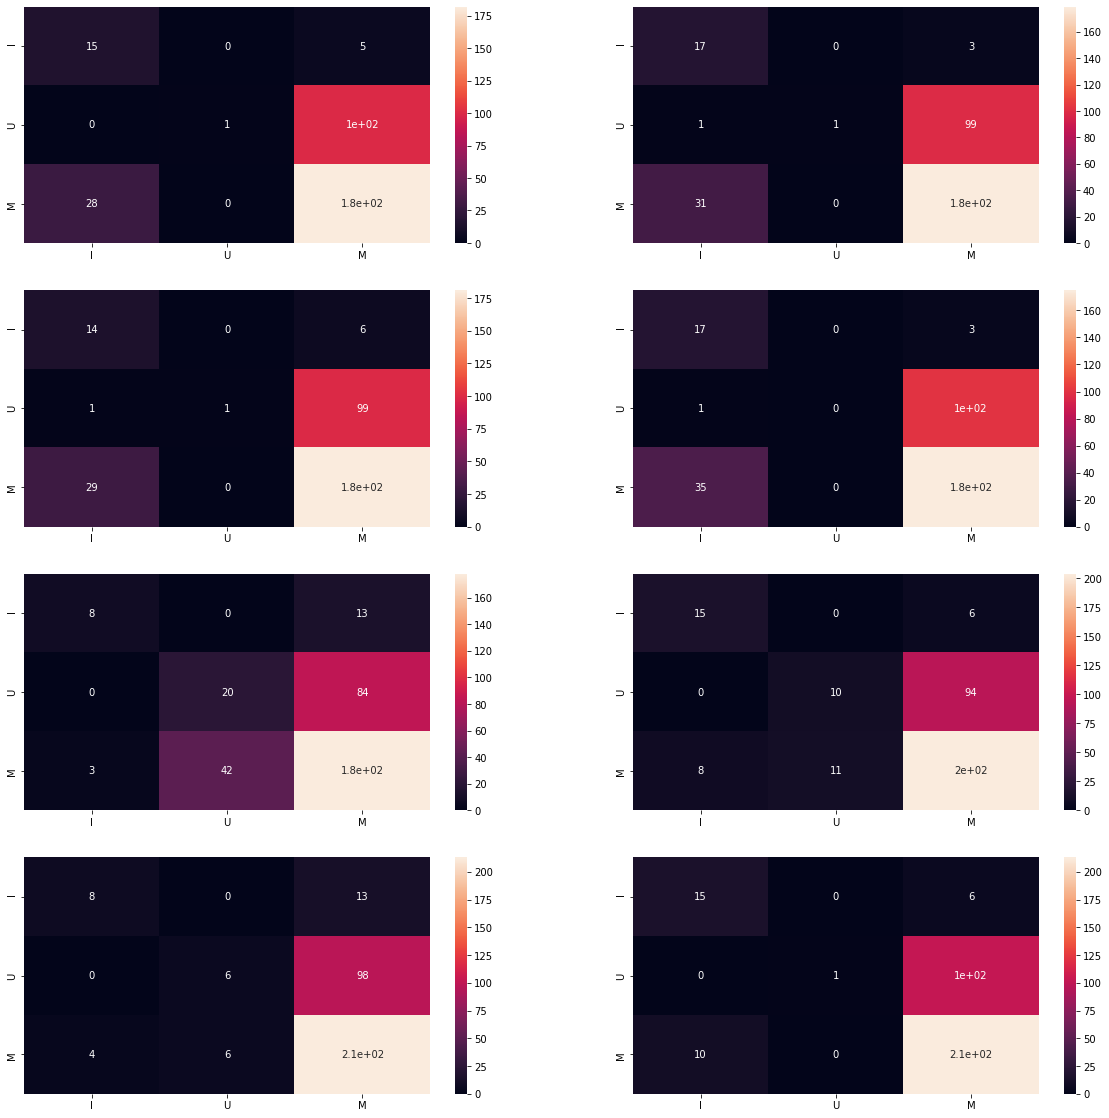

In [149]:
plt.subplots(figsize=(20,20))
for num, key1 in enumerate(['text_7props_19k_old_2', 'text_7props_19k_new_2', 'text_2props_19k_old_2', 'text_2props_19k_new_2', 
             'transe_19k_old_1', 'transe_19k_new_1', 'complex_19k_old_1', 'complex_19k_new_1']):
    plt.subplot(4, 2, num+1)
    sns.heatmap(pd.DataFrame(confusionMatrixMaster[key1], LABELS, LABELS), annot=True)

# Save all embeddings and similarity scores

In [99]:
newEmbedDictMaster['concat_probase_19k_v1_2'] = newEmbedDictMaster['concat_probase_19k__v1_2']

In [100]:
emb_pairs = [('text_7props_19k', 'text_7props_19k_2'),
             ('text_2props_19k', 'text_2props_19k_2'),
             ('complex_19k', 'complex_19k_2'),
             ('transe_19k', 'transe_19k_1'),
             ('abstract_19k', 'abstract_19k_2'),
             ('abstract_firstSent_19k', 'abstract_firstSent_19k_2'),
             ('complex_probase', 'complex_probase_2'),
             ('transe_probase', 'transe_probase_1'),
             ('complex_probase_19k', 'complex_probase_19k_2'),
             ('transe_probase_19k', 'transe_probase_19k_1'),
             ('concat_19k_v1', 'concat_19k_v1_2'),
             ('concat_probase_19k_v1', 'concat_probase_19k_v1_2'),
             ('concat_19k_v2', 'concat_19k_v2_2'),
             ('concat_probase_19k_v2', 'concat_probase_19k_v2_2')]

wordSim353AnnotDF_New = pd.read_csv('../data/wordsim353_with_r3.csv')
print(f"Length of wordsim dataset: {len(wordSim353AnnotDF_New)}")
assert wordSim353AnnotDF_New.word1_kg_id.isna().sum() == 0
assert wordSim353AnnotDF_New.word2_kg_id.isna().sum() == 0
wordSim353AnnotDF_New['category'] = wordSim353AnnotDF_New.Avg.apply(labelSamples)


for key1, key2 in tqdm(emb_pairs):
#     wordSim353AnnotDF_New2 = wordSim353AnnotDF_New[wordSim353AnnotDF_New.apply(lambda p: p['word1_kg_id'] in embedDict and p['word2_kg_id'] in embedDict, axis=1)]
#     wordSimMissingSet = set(wordSim353AnnotDF_New[wordSim353AnnotDF_New.word1_kg_id.apply(lambda p: p not in embedDict)].word1_kg_id.to_list() + wordSim353AnnotDF_New[wordSim353AnnotDF_New.word2_kg_id.apply(lambda p: p not in embedDict)].word2_kg_id.to_list())
    #     wordSimMissingSet
#     print(f"No. of pairs with some value for embeddings: {len(wordSim353AnnotDF_New2)}")

    embedDict = embedDictMaster[key1]
    newEmbedDict = newEmbedDictMaster[key2]
    
    wordSim353AnnotDF_New[key1+'_word1_old'] = wordSim353AnnotDF_New.apply(lambda p: embedDict[p['word1_kg_id']].tolist() if p['word1_kg_id'] in embedDict else None, axis=1)
    wordSim353AnnotDF_New[key1+'_word2_old'] = wordSim353AnnotDF_New.apply(lambda p: embedDict[p['word2_kg_id']].tolist() if p['word2_kg_id'] in embedDict else None, axis=1)
    
    wordSim353AnnotDF_New[key1+'_word1_new'] = wordSim353AnnotDF_New.apply(lambda p: newEmbedDict[p['word1_kg_id']].tolist() if p['word1_kg_id'] in newEmbedDict else None, axis=1)
    wordSim353AnnotDF_New[key1+'_word2_new'] = wordSim353AnnotDF_New.apply(lambda p: newEmbedDict[p['word2_kg_id']].tolist() if p['word2_kg_id'] in newEmbedDict else None, axis=1)
    
    wordSim353AnnotDF_New[key1+'_old_cosSim'] = wordSim353AnnotDF_New.apply(lambda p: cosine_similarity(np.array(embedDict[p['word1_kg_id']]).reshape(1,-1), np.array(embedDict[p['word2_kg_id']]).reshape(1,-1))[0][0] if p['word1_kg_id'] in embedDict and p['word2_kg_id'] in embedDict else -1, axis=1)
    wordSim353AnnotDF_New[key2+'_new_cosSim'] = wordSim353AnnotDF_New.apply(lambda p: cosine_similarity(np.array(newEmbedDict[p['word1_kg_id']]).reshape(1,-1), np.array(newEmbedDict[p['word2_kg_id']]).reshape(1,-1))[0][0] if p['word1_kg_id'] in newEmbedDict and p['word2_kg_id'] in newEmbedDict else -1, axis=1)
    wordSim353AnnotDF_New[key1+'_old_cosSim'] = wordSim353AnnotDF_New[key1+'_old_cosSim'].apply(lambda p: 4 - 3 * p)
    wordSim353AnnotDF_New[key2+'_new_cosSim'] = wordSim353AnnotDF_New[key2+'_new_cosSim'].apply(lambda p: 4 - 3 * p)
wordSim353AnnotDF_New_Merged_DF = wordSim353AnnotDF_New

Length of wordsim dataset: 344


  0%|          | 0/14 [00:00<?, ?it/s]

In [101]:
wordSim353AnnotDF_New_Merged_DF.columns

Index(['Word 1', 'Word 2', 'ID', 'H_Sim', 'H_Dim', 'F_Sim', 'F_Dim', 'N_Sim',
       'N_Dim', 'D_Sim',
       ...
       'concat_19k_v2_word1_new', 'concat_19k_v2_word2_new',
       'concat_19k_v2_old_cosSim', 'concat_19k_v2_2_new_cosSim',
       'concat_probase_19k_v2_word1_old', 'concat_probase_19k_v2_word2_old',
       'concat_probase_19k_v2_word1_new', 'concat_probase_19k_v2_word2_new',
       'concat_probase_19k_v2_old_cosSim',
       'concat_probase_19k_v2_2_new_cosSim'],
      dtype='object', length=104)

In [102]:
wordSim353AnnotDF_New_Merged_DF.head()

,Word 1,Word 2,ID,H_Sim,H_Dim,F_Sim,F_Dim,N_Sim,N_Dim,D_Sim,...,concat_19k_v2_word1_new,concat_19k_v2_word2_new,concat_19k_v2_old_cosSim,concat_19k_v2_2_new_cosSim,concat_probase_19k_v2_word1_old,concat_probase_19k_v2_word2_old,concat_probase_19k_v2_word1_new,concat_probase_19k_v2_word2_new,concat_probase_19k_v2_old_cosSim,concat_probase_19k_v2_2_new_cosSim
0,Arafat,peace,8,3,D,4,NaN,3,U,4,...,"[0.0067204430541292475, 0.008331487632641807, ...","[-0.004515859562266559, -0.011723668837741234,...",3.468370,3.384407,"[0.006720440253943506, 0.00833148416118722, 0....","[-0.0050116109222357935, -0.013383541509188317...","[0.006720440253943506, 0.00833148416118722, 0....","[-0.004971298302113362, -0.013254267455943004,...",3.468370,3.463734
1,Arafat,terror,9,3,D,4,NaN,3,U,4,...,"[0.0067204430541292475, 0.008331487632641807, ...","[-0.004862257036458548, 0.014077170447753274, ...",3.035534,2.991152,"[0.006720440253943506, 0.00833148416118722, 0....","[-0.005805280378137928, 0.015115419540555773, ...","[0.006720440253943506, 0.00833148416118722, 0....","[-0.004862255010517295, 0.01407716458226321, 0...",3.035534,2.991152
2,FBI,fingerprint,109,3,D,4,NaN,4,NaN,3,...,"[0.006466897046995817, 0.014694837513784692, -...","[0.01523113313292473, 0.005271417432183582, -0...",2.902356,2.850218,"[0.0064668943524542844, 0.014694831390933237, ...","[0.013922101038066187, 0.0023911841962956006, ...","[0.0064668943524542844, 0.014694831390933237, ...","[0.01381456413075283, 0.0024352598782685863, -...",2.902356,2.895993
3,FBI,investigation,110,3,U,3,U,3,U,3,...,"[0.006466897046995817, 0.014694837513784692, -...","[0.013016090555331788, 0.01114268765690899, -0...",2.995206,2.962306,"[0.0064668943524542844, 0.014694831390933237, ...","[0.013274960537868754, 0.010965634834463656, -...","[0.0064668943524542844, 0.014694831390933237, ...","[0.013242882478240212, 0.010953106140234146, -...",2.995206,2.993596
4,Harvard,Yale,137,2,S,3,S,2,S,2,...,"[0.01322626153814759, 0.005047111609608307, -0...","[0.010410829355084429, 0.014776997941327313, -...",1.689315,1.689315,"[0.013226256027203037, 0.00504710950664428, -0...","[0.010410825017237097, 0.01477699178424233, -0...","[0.013226256027203037, 0.00504710950664428, -0...","[0.010410825017237097, 0.01477699178424233, -0...",1.689315,1.689315


In [212]:
cons_ann_3 = pd.read_csv('../data/consolidated_annotation_r3.csv')

In [213]:
cons_ann_3.head()

,Word 1,Word 2,H_Sim,H_Dim,F_Sim,F_Dim,N_Sim,N_Dim,D_Sim,D_Dim,P_Sim,P_Dim,Avg,Stdev,H_orig,H_reversed
0,tool,implement,1,NaN,3,U,1,NaN,2,i,1,NaN,1.6,0.894,5.313,4.688
1,arrangement,accommodation,1,NaN,4,NaN,2,I,1,NaN,1,NaN,1.8,1.304,5.125,4.875
2,wood,forest,3,H,1,NaN,1,NaN,1,NaN,3,l,1.8,1.095,7.938,2.063
3,benchmark,index,2,I,2,I,2,I,4,NaN,4,NaN,2.8,1.095,5.500,4.500
4,practice,institution,2,I,3,"L,I",3,I,3,i,3,i,2.8,0.447,3.563,6.438


In [222]:
len(cons_ann_3)

15

In [300]:
ca_cols = cons_ann_3.columns
for _,row in cons_ann_3.iterrows():
#     if ((wordSim353AnnotDF_New_Merged_DF['Word 1'] == row['Word 1']) & (wordSim353AnnotDF_New_Merged_DF['Word 2'] == row['Word 2'])).sum() == 2:
#         print(row['Word 1'], row['Word 2'])
#         print(wordSim353AnnotDF_New_Merged_DF[((wordSim353AnnotDF_New_Merged_DF['Word 1'] == row['Word 1']) & (wordSim353AnnotDF_New_Merged_DF['Word 2'] == row['Word 2']))])
#     print (((wordSim353AnnotDF_New_Merged_DF['Word 1'] == row['Word 1']) & (wordSim353AnnotDF_New_Merged_DF['Word 2'] == row['Word 2'])).sum())
    for col in ca_cols:
        if col in ['Word 1', 'Word 2']:
            continue
        
        wordSim353AnnotDF_New_Merged_DF.at[wordSim353AnnotDF_New_Merged_DF.index[(wordSim353AnnotDF_New_Merged_DF['Word 1'] == row['Word 1']) & (wordSim353AnnotDF_New_Merged_DF['Word 2'] == row['Word 2'])], col] = row[col]
#         print(wordSim353AnnotDF_New_Merged_DF[(wordSim353AnnotDF_New_Merged_DF['Word 1'] == row['Word 1']) & (wordSim353AnnotDF_New_Merged_DF['Word 2'] == row['Word 2'])][col])
#     

In [301]:
wordSim353AnnotDF_New_Merged_DF = wordSim353AnnotDF_New_Merged_DF[~wordSim353AnnotDF_New_Merged_DF[['Word 1', 'Word 2']].duplicated()]

In [103]:
wordSim353AnnotDF_New_Merged_DF.to_csv('../data/wordsim353_all_embeddings_with_retrofits_new.csv', index=None)

In [104]:
wordSim353AnnotDF_New_Merged_DF[['Word 1',
 'Word 2',
 'ID',
 'H_Sim',
 'H_Dim',
 'F_Sim',
 'F_Dim',
 'N_Sim',
 'N_Dim',
 'D_Sim',
 'D_Dim',
 'P_Sim',
 'P_Dim',
 'Avg',
 'Stdev',
 'H_orig',
 'H_reversed',
 'word1_kg_id',
 'word2_kg_id',
 'category'] + list(filter(lambda p: 'cosSim' in p, wordSim353AnnotDF_New_Merged_DF.columns.to_list()))].to_csv('../data/wordsim353_all_embeddings_with_retrofits_scores_only_new.csv', index=None)

# Determine Differences

In [3]:
wordSim353AnnotDF_New_Merged_DF = pd.read_csv('../data/wordsim353_all_embeddings_with_retrofits.csv')

In [4]:
wordSim353AnnotDF_New_Merged_DF['transe_19k_old_cosSim_Diff'] = abs(wordSim353AnnotDF_New_Merged_DF['transe_19k_old_cosSim'] - wordSim353AnnotDF_New_Merged_DF['Avg'])

In [5]:
wordSim353AnnotDF_New_Merged_DF['transe_19k_1_new_cosSim_Diff'] = abs(wordSim353AnnotDF_New_Merged_DF['transe_19k_1_new_cosSim'] - wordSim353AnnotDF_New_Merged_DF['Avg'])

In [6]:
pd.options.display.max_colwidth = 50

In [7]:
wordSim353AnnotDF_New_Merged_DF.sort_values(by=['transe_19k_old_cosSim_Diff'],ascending=False)['transe_19k_old_cosSim_Diff'].describe()

count    344.000000
mean       0.580594
std        0.457960
min        0.000000
25%        0.222619
50%        0.495179
75%        0.852326
max        5.000000
Name: transe_19k_old_cosSim_Diff, dtype: float64

In [8]:
wordSim353AnnotDF_New_Merged_DF.sort_values(by=['transe_19k_1_new_cosSim_Diff'],ascending=False)['transe_19k_1_new_cosSim_Diff'].describe()

count    344.000000
mean       0.645644
std        0.526932
min        0.000000
25%        0.250461
50%        0.562808
75%        0.927608
max        5.000000
Name: transe_19k_1_new_cosSim_Diff, dtype: float64

In [9]:
def determineFarNessOfOld(val1):
    if 0.000000 <= val1 < 0.495179:
        return 0
    else:
        return 1
def determineFarNessOfNew(val1):
    if 0 <= val1 < 0.562808:
        return 0
    else:
        return 1

wordSim353AnnotDF_New_Merged_DF['transe_19k_old_cosSim_Diff_Cat'] = wordSim353AnnotDF_New_Merged_DF['transe_19k_old_cosSim_Diff'].apply(determineFarNessOfOld)
wordSim353AnnotDF_New_Merged_DF['transe_19k_1_new_cosSim_Diff_Cat'] = wordSim353AnnotDF_New_Merged_DF['transe_19k_1_new_cosSim_Diff'].apply(determineFarNessOfNew)

In [10]:
wordSim353AnnotDF_New_Merged_DF = wordSim353AnnotDF_New_Merged_DF[['Word 1', 'Word 2', 'Avg', 'transe_19k_old_cosSim', 'transe_19k_1_new_cosSim', 'transe_19k_old_cosSim_Diff', 'transe_19k_1_new_cosSim_Diff', 'transe_19k_old_cosSim_Diff_Cat', 'transe_19k_1_new_cosSim_Diff_Cat']]

In [11]:
wordSim353AnnotDF_New_Merged_DF

,Word 1,Word 2,Avg,transe_19k_old_cosSim,transe_19k_1_new_cosSim,transe_19k_old_cosSim_Diff,transe_19k_1_new_cosSim_Diff,transe_19k_old_cosSim_Diff_Cat,transe_19k_1_new_cosSim_Diff_Cat
0,Arafat,peace,3.60,3.076303,3.477665,0.523697,0.122335,1,0
1,Arafat,terror,3.60,3.103668,2.952181,0.496332,0.647819,1,1
2,FBI,fingerprint,3.60,2.911334,3.126209,0.688666,0.473791,1,0
3,FBI,investigation,3.00,2.881763,2.943750,0.118237,0.056250,0,0
4,Harvard,Yale,2.20,2.135042,2.080022,0.064958,0.119978,0,0
...,...,...,...,...,...,...,...,...,...
339,war,troops,3.00,2.807539,3.161937,0.192461,0.161937,0,0
340,weapon,secret,3.80,3.310261,2.793832,0.489739,1.006168,0,1
341,weather,forecast,3.00,2.449602,2.739280,0.550398,0.260720,1,0
342,wood,forest,1.80,2.931610,3.541754,1.131610,1.741754,1,1


In [12]:
len(wordSim353AnnotDF_New_Merged_DF[(wordSim353AnnotDF_New_Merged_DF['transe_19k_old_cosSim_Diff_Cat'] == 0) & (wordSim353AnnotDF_New_Merged_DF['transe_19k_1_new_cosSim_Diff_Cat'] == 0)])

123

In [23]:
wordSim353AnnotDF_New_Merged_DF['old_cat'] = wordSim353AnnotDF_New_Merged_DF['transe_19k_old_cosSim'].apply(labelSamples)

In [24]:
wordSim353AnnotDF_New_Merged_DF['new_cat'] = wordSim353AnnotDF_New_Merged_DF['transe_19k_1_new_cosSim'].apply(labelSamples)

In [25]:
wordSim353AnnotDF_New_Merged_DF['cat'] = wordSim353AnnotDF_New_Merged_DF['Avg'].apply(labelSamples)

In [26]:
wordSim353AnnotDF_New_Merged_DF[wordSim353AnnotDF_New_Merged_DF['old_cat'] != wordSim353AnnotDF_New_Merged_DF['cat']].to_csv('../data/transEmb/badBefore.csv',index=None)

In [27]:
wordSim353AnnotDF_New_Merged_DF[wordSim353AnnotDF_New_Merged_DF['new_cat'] != wordSim353AnnotDF_New_Merged_DF['cat']].to_csv('../data/transEmb/badAfter.csv',index=None)

In [28]:
wordSim353AnnotDF_New_Merged_DF.to_csv('../data/transEmb/entireSet.csv',index=None)

In [13]:
wordSim353AnnotDF_New_Merged_DF[(wordSim353AnnotDF_New_Merged_DF['transe_19k_old_cosSim_Diff_Cat'] == 0) & (wordSim353AnnotDF_New_Merged_DF['transe_19k_1_new_cosSim_Diff_Cat'] == 0)].to_csv('../data/transEmb/good+good.csv',index=None)

In [14]:
wordSim353AnnotDF_New_Merged_DF[(wordSim353AnnotDF_New_Merged_DF['transe_19k_old_cosSim_Diff_Cat'] == 0) & (wordSim353AnnotDF_New_Merged_DF['transe_19k_1_new_cosSim_Diff_Cat'] == 1)].to_csv('../data/transEmb/good+bad.csv',index=None)

In [15]:
wordSim353AnnotDF_New_Merged_DF[(wordSim353AnnotDF_New_Merged_DF['transe_19k_old_cosSim_Diff_Cat'] == 1) & (wordSim353AnnotDF_New_Merged_DF['transe_19k_1_new_cosSim_Diff_Cat'] == 0)].to_csv('../data/transEmb/bad+good.csv',index=None)

In [16]:
wordSim353AnnotDF_New_Merged_DF[(wordSim353AnnotDF_New_Merged_DF['transe_19k_old_cosSim_Diff_Cat'] == 1) & (wordSim353AnnotDF_New_Merged_DF['transe_19k_1_new_cosSim_Diff_Cat'] == 1)].to_csv('../data/transEmb/bad+bad.csv',index=None)

In [4]:
wordSim353AnnotDF_New_Merged_DF['concat_19k_v1_old_cosSim_Diff'] = abs(wordSim353AnnotDF_New_Merged_DF['concat_19k_v1_old_cosSim'] - wordSim353AnnotDF_New_Merged_DF['Avg'])

In [5]:
wordSim353AnnotDF_New_Merged_DF['concat_19k_v1_2_new_cosSim_Diff'] = abs(wordSim353AnnotDF_New_Merged_DF['concat_19k_v1_2_new_cosSim'] - wordSim353AnnotDF_New_Merged_DF['Avg'])

In [6]:
pd.options.display.max_colwidth = 50

In [8]:
wordSim353AnnotDF_New_Merged_DF.sort_values(by=['concat_19k_v1_old_cosSim_Diff'],ascending=False)['concat_19k_v1_old_cosSim_Diff'].describe()

count    344.000000
mean       0.567297
std        0.435379
min        0.000000
25%        0.250130
50%        0.508725
75%        0.835197
max        5.000000
Name: concat_19k_v1_old_cosSim_Diff, dtype: float64

In [9]:
wordSim353AnnotDF_New_Merged_DF.sort_values(by=['concat_19k_v1_2_new_cosSim_Diff'],ascending=False)['concat_19k_v1_2_new_cosSim_Diff'].describe()

count    3.440000e+02
mean     5.938081e-01
std      4.503200e-01
min      4.440892e-16
25%      2.665817e-01
50%      5.349785e-01
75%      8.528840e-01
max      5.000000e+00
Name: concat_19k_v1_2_new_cosSim_Diff, dtype: float64

In [10]:
def determineFarNessOfOld(val1):
    if 0.000000 <= val1 < 0.508725:
        return 0
    else:
        return 1
def determineFarNessOfNew(val1):
    if 0 <= val1 < 5.349785e-01:
        return 0
    else:
        return 1

wordSim353AnnotDF_New_Merged_DF['concat_19k_v1_old_cosSim_Diff_Cat'] = wordSim353AnnotDF_New_Merged_DF['concat_19k_v1_old_cosSim_Diff'].apply(determineFarNessOfOld)
wordSim353AnnotDF_New_Merged_DF['concat_19k_v1_2_new_cosSim_Diff_Cat'] = wordSim353AnnotDF_New_Merged_DF['concat_19k_v1_2_new_cosSim_Diff'].apply(determineFarNessOfNew)

In [11]:
wordSim353AnnotDF_New_Merged_DF = wordSim353AnnotDF_New_Merged_DF[['Word 1', 'Word 2', 'Avg', 'concat_19k_v1_old_cosSim', 'concat_19k_v1_2_new_cosSim', 'concat_19k_v1_old_cosSim_Diff', 'concat_19k_v1_2_new_cosSim_Diff', 'concat_19k_v1_old_cosSim_Diff_Cat', 'concat_19k_v1_2_new_cosSim_Diff_Cat']]


In [12]:
wordSim353AnnotDF_New_Merged_DF

,Word 1,Word 2,Avg,concat_19k_v1_old_cosSim,concat_19k_v1_2_new_cosSim,concat_19k_v1_old_cosSim_Diff,concat_19k_v1_2_new_cosSim_Diff,concat_19k_v1_old_cosSim_Diff_Cat,concat_19k_v1_2_new_cosSim_Diff_Cat
0,Arafat,peace,3.60,3.251198,3.193271,0.348802,0.406729,0,0
1,Arafat,terror,3.60,3.231409,3.157229,0.368591,0.442771,0,0
2,FBI,fingerprint,3.60,2.948487,2.853048,0.651513,0.746952,1,1
3,FBI,investigation,3.00,2.930365,2.895604,0.069635,0.104396,0,0
4,Harvard,Yale,2.20,1.991054,1.991054,0.208946,0.208946,0,0
...,...,...,...,...,...,...,...,...,...
339,war,troops,3.00,2.913931,2.787213,0.086069,0.212787,0,0
340,weapon,secret,3.80,3.152513,3.119065,0.647487,0.680935,1,1
341,weather,forecast,3.00,2.492765,2.462389,0.507235,0.537611,0,1
342,wood,forest,1.80,2.612681,2.606941,0.812681,0.806941,1,1


In [13]:
len(wordSim353AnnotDF_New_Merged_DF[(wordSim353AnnotDF_New_Merged_DF['concat_19k_v1_old_cosSim_Diff_Cat'] == 0) & (wordSim353AnnotDF_New_Merged_DF['concat_19k_v1_2_new_cosSim_Diff_Cat'] == 0)])

164

In [15]:
wordSim353AnnotDF_New_Merged_DF[(wordSim353AnnotDF_New_Merged_DF['concat_19k_v1_old_cosSim_Diff_Cat'] == 0) & (wordSim353AnnotDF_New_Merged_DF['concat_19k_v1_2_new_cosSim_Diff_Cat'] == 0)].to_csv('../data/concEmb/good+good.csv',index=None)

In [16]:
wordSim353AnnotDF_New_Merged_DF[(wordSim353AnnotDF_New_Merged_DF['concat_19k_v1_old_cosSim_Diff_Cat'] == 0) & (wordSim353AnnotDF_New_Merged_DF['concat_19k_v1_2_new_cosSim_Diff_Cat'] == 1)].to_csv('../data/concEmb/good+bad.csv',index=None)

In [17]:
wordSim353AnnotDF_New_Merged_DF[(wordSim353AnnotDF_New_Merged_DF['concat_19k_v1_old_cosSim_Diff_Cat'] == 1) & (wordSim353AnnotDF_New_Merged_DF['concat_19k_v1_2_new_cosSim_Diff_Cat'] == 0)].to_csv('../data/concEmb/bad+good.csv',index=None)

In [18]:
wordSim353AnnotDF_New_Merged_DF[(wordSim353AnnotDF_New_Merged_DF['concat_19k_v1_old_cosSim_Diff_Cat'] == 1) & (wordSim353AnnotDF_New_Merged_DF['concat_19k_v1_2_new_cosSim_Diff_Cat'] == 1)].to_csv('../data/concEmb/bad+bad.csv',index=None)

# SVM Models

In [144]:
!pip install datacompy

In [177]:
wordSim353AnnotDF_New_Merged_DF = pd.read_csv('../data/wordsim353_all_embeddings_with_retrofits_new.csv')

In [181]:
wordSim353AnnotDF_New_Merged_DF_old = pd.read_csv('../data/wordsim353_all_embeddings_with_retrofits.csv')

In [142]:
wordSim353AnnotDF_New_Merged_DF_old.head()

,Word 1,Word 2,ID,H_Sim,H_Dim,F_Sim,F_Dim,N_Sim,N_Dim,D_Sim,...,concat_19k_v2_word1_new,concat_19k_v2_word2_new,concat_19k_v2_old_cosSim,concat_19k_v2_2_new_cosSim,concat_probase_19k_v2_word1_old,concat_probase_19k_v2_word2_old,concat_probase_19k_v2_word1_new,concat_probase_19k_v2_word2_new,concat_probase_19k_v2_old_cosSim,concat_probase_19k_v2_2_new_cosSim
0,Arafat,peace,8,3,D,4,NaN,3,U,4,...,"[0.006720443092017323, 0.008331487679612525, 0...","[-0.004515859576248157, -0.01172366887295375, ...",3.244539,3.175157,"[0.006720440291834372, 0.008331484208161396, 0...","[-0.005011610937734838, -0.013383541550578623,...","[0.006720440291834372, 0.008331484208161396, 0...","[-0.00497129831746384, -0.01325426749683971, -...",3.244539,3.240270
1,Arafat,terror,9,3,D,4,NaN,3,U,4,...,"[0.006720443092017323, 0.008331487679612525, 0...","[-0.004862257088069111, 0.014077170590128979, ...",3.085083,3.013958,"[0.006720440291834372, 0.008331484208161396, 0...","[-0.005805280438126139, 0.015115419696749257, ...","[0.006720440291834372, 0.008331484208161396, 0...","[-0.004862255062129871, 0.014077164724644747, ...",3.085083,3.013958
2,FBI,fingerprint,109,3,D,4,NaN,4,NaN,3,...,"[0.006466897059812569, 0.014694837542908411, -...","[0.01523113309590259, 0.005271417380511587, -0...",2.823093,2.745230,"[0.006466894365273728, 0.014694831420063071, -...","[0.013922101136130544, 0.0023911842131386003, ...","[0.006466894365273728, 0.014694831420063071, -...","[0.013814564227839972, 0.0024352598952305004, ...",2.823093,2.816176
3,FBI,investigation,110,3,U,3,U,3,U,3,...,"[0.006466897059812569, 0.014694837542908411, -...","[0.013016090623183913, 0.01114268771757639, -0...",2.920986,2.886161,"[0.006466894365273728, 0.014694831420063071, -...","[0.01327496060589727, 0.010965634890657862, -0...","[0.006466894365273728, 0.014694831420063071, -...","[0.013242882546106787, 0.010953106196386554, -...",2.920986,2.919120
4,Harvard,Yale,137,2,S,3,S,2,S,2,...,"[0.01322626159341165, 0.005047111630696947, -0...","[0.010410829393995813, 0.014776997996557633, -...",1.707655,1.707655,"[0.013226256082472592, 0.005047109527735016, -...","[0.010410825056152807, 0.014776991839478788, -...","[0.013226256082472592, 0.005047109527735016, -...","[0.010410825056152807, 0.014776991839478788, -...",1.707655,1.707655


In [184]:
wordSim353AnnotDF_New_Merged_DF[list(filter(lambda p: 'cosSim' in p, wordSim353AnnotDF_New_Merged_DF.columns.to_list()))].describe()

,text_7props_19k_old_cosSim,text_7props_19k_2_new_cosSim,text_2props_19k_old_cosSim,text_2props_19k_2_new_cosSim,complex_19k_old_cosSim,complex_19k_2_new_cosSim,transe_19k_old_cosSim,transe_19k_1_new_cosSim,abstract_19k_old_cosSim,abstract_19k_2_new_cosSim,...,transe_probase_19k_old_cosSim,transe_probase_19k_1_new_cosSim,concat_19k_v1_old_cosSim,concat_19k_v1_2_new_cosSim,concat_probase_19k_v1_old_cosSim,concat_probase_19k_v1_2_new_cosSim,concat_19k_v2_old_cosSim,concat_19k_v2_2_new_cosSim,concat_probase_19k_v2_old_cosSim,concat_probase_19k_v2_2_new_cosSim
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,...,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,2.511033,2.464876,2.482254,2.435161,2.983302,2.684818,2.983302,2.680002,2.652866,2.593916,...,2.983302,2.565886,2.875381,2.826493,2.875381,2.865101,2.868066,2.816685,2.868066,2.856603
std,1.148821,1.152911,1.151060,1.155427,0.645911,0.539092,0.645911,0.619239,0.680525,0.653512,...,0.645911,0.596750,0.573902,0.575585,0.573902,0.574410,1.097121,1.106362,1.097121,1.099179
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.005097,1.963229,1.993424,1.949869,2.588591,2.455431,2.588591,2.311818,2.180912,2.137568,...,2.588591,2.183686,2.577938,2.551033,2.577938,2.583811,2.384337,2.350645,2.384337,2.377672
50%,2.328276,2.273674,2.274668,2.232156,3.039087,2.708569,3.039087,2.722278,2.616810,2.591640,...,3.039087,2.608041,2.950578,2.912098,2.950578,2.933984,2.716471,2.657078,2.716471,2.704941
75%,2.636907,2.576155,2.580482,2.527554,3.359243,2.959259,3.359243,3.090563,3.208919,3.060782,...,3.359243,2.935226,3.208735,3.164426,3.208735,3.196270,2.992265,2.899626,2.992265,2.977770
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,4.340089,4.327902,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [182]:
import datacompy
compare = datacompy.Compare(
    wordSim353AnnotDF_New_Merged_DF[['Word 1',
 'Word 2',
 'Avg',
 'word1_kg_id',
 'word2_kg_id',
 'category'] + list(filter(lambda p: 'cosSim' in p, wordSim353AnnotDF_New_Merged_DF.columns.to_list()))],
    wordSim353AnnotDF_New_Merged_DF_old[['Word 1',
 'Word 2',
 'Avg',
 'word1_kg_id',
 'word2_kg_id',
 'category'] + list(filter(lambda p: 'cosSim' in p, wordSim353AnnotDF_New_Merged_DF_old.columns.to_list()))],
    join_columns = ['Word 1', 'Word 2'])

In [183]:
print(compare.report())

DataComPy Comparison
--------------------

DataFrame Summary
-----------------

  DataFrame  Columns  Rows
0       df1       34   344
1       df2       34   344

Column Summary
--------------

Number of columns in common: 32
Number of columns in df1 but not in df2: 2
Number of columns in df2 but not in df1: 2

Row Summary
-----------

Matched on: word 1, word 2
Any duplicates on match values: No
Absolute Tolerance: 0
Relative Tolerance: 0
Number of rows in common: 344
Number of rows in df1 but not in df2: 0
Number of rows in df2 but not in df1: 0

Number of rows with some compared columns unequal: 343
Number of rows with all compared columns equal: 1

Column Comparison
-----------------

Number of columns compared with some values unequal: 27
Number of columns compared with all values equal: 5
Total number of values which compare unequal: 5,136

Columns with Unequal Values or Types
------------------------------------

                                 Column df1 dtype df2 dtype  # Uneq

In [157]:
wordSim353AnnotDF_New_Merged_DF.head()

,word1_kg_id,word2_kg_id,word 1,word 2,id,h_sim,h_dim,f_sim,f_dim,n_sim,...,concat_19k_v2_word2_new,concat_19k_v2_old_cossim,concat_19k_v2_2_new_cossim,concat_probase_19k_v2_word1_old,concat_probase_19k_v2_word2_old,concat_probase_19k_v2_word1_new,concat_probase_19k_v2_word2_new,concat_probase_19k_v2_old_cossim,concat_probase_19k_v2_2_new_cossim,avg_old
0,Q106106,Q11460,closet,clothes,42,3,H,3,H,3,...,"[0.0014151543049584102, 0.003161483781535701, ...",2.697022,2.652559,"[0.013902607489678993, 0.013241494756981564, -...","[0.0014224480432097992, 0.0031547764732941653,...","[0.01371531560905985, 0.013126875633706597, -0...","[0.0014206775968733409, 0.0031581452887393872,...",2.697022,2.683318,3.0
1,Q107,Q16502,space,world,293,3,L,3,S,3,...,"[-0.0031782974877087693, 0.003973805776938075,...",2.485859,2.347308,"[0.00027019944749503126, 0.005353652289998999,...","[-0.0032792710227188605, 0.0036472880832864947...","[0.00027492382990721006, 0.0053545622809597, -...","[-0.0032450374860671267, 0.0036673577053825254...",2.485859,2.481352,3.2
2,Q107,Q2329,space,chemistry,292,4,NaN,4,NaN,4,...,"[0.015268952851071075, -0.0024137893437008715,...",2.798788,2.782963,"[0.00027019944749503126, 0.005353652289998999,...","[0.015322423107720673, -0.0024500099720118624,...","[0.00027492382990721006, 0.0053545622809597, -...","[0.015281665873653082, -0.002421165402091456, ...",2.798788,2.795047,4.0
3,Q1074,Q7364,skin,eye,288,3,H,3,H,3,...,"[0.002992664951436964, 0.013922942027531155, -...",2.355813,2.314417,"[-0.0026976204618851985, 0.001541600665881322,...","[0.0033640181667058486, 0.014044398230441645, ...","[-0.002678224125439186, 0.0015598357892553907,...","[0.0033484286344994184, 0.014002864550517797, ...",2.355813,2.350603,3.0
4,Q1079023,Q500834,championship,tournament,38,1,NaN,1,NaN,2,...,"[0.00920825730356781, 0.011965374832474578, 0....",1.868699,1.865663,"[-0.0008601077391385219, 0.005201185839222482,...","[0.00923153244996602, 0.011960544533439752, 0....","[-0.0008458279784483333, 0.005209858282773185,...","[0.009207264410626997, 0.011951895965764294, 0...",1.868699,1.866785,1.2


In [107]:
cosine_similarity(np.array([float(val1) for val1 in wordSim353AnnotDF_New_Merged_DF.iloc[0]['concat_19k_v2_word1_new'][1:-1].split(",")]).reshape(1,-1), np.array([float(val1) for val1 in wordSim353AnnotDF_New_Merged_DF.iloc[0]['concat_19k_v2_word2_new'][1:-1].split(",")]).reshape(1,-1))

array([[0.20519776]])

In [108]:
wordSim353AnnotDF_New_Merged_DF.columns

Index(['Word 1', 'Word 2', 'ID', 'H_Sim', 'H_Dim', 'F_Sim', 'F_Dim', 'N_Sim',
       'N_Dim', 'D_Sim',
       ...
       'concat_19k_v2_word1_new', 'concat_19k_v2_word2_new',
       'concat_19k_v2_old_cosSim', 'concat_19k_v2_2_new_cosSim',
       'concat_probase_19k_v2_word1_old', 'concat_probase_19k_v2_word2_old',
       'concat_probase_19k_v2_word1_new', 'concat_probase_19k_v2_word2_new',
       'concat_probase_19k_v2_old_cosSim',
       'concat_probase_19k_v2_2_new_cosSim'],
      dtype='object', length=104)

In [109]:
list(filter(lambda p: 'cosSim' in p, wordSim353AnnotDF_New_Merged_DF.columns))

['text_7props_19k_old_cosSim',
 'text_7props_19k_2_new_cosSim',
 'text_2props_19k_old_cosSim',
 'text_2props_19k_2_new_cosSim',
 'complex_19k_old_cosSim',
 'complex_19k_2_new_cosSim',
 'transe_19k_old_cosSim',
 'transe_19k_1_new_cosSim',
 'abstract_19k_old_cosSim',
 'abstract_19k_2_new_cosSim',
 'abstract_firstSent_19k_old_cosSim',
 'abstract_firstSent_19k_2_new_cosSim',
 'complex_probase_old_cosSim',
 'complex_probase_2_new_cosSim',
 'transe_probase_old_cosSim',
 'transe_probase_1_new_cosSim',
 'complex_probase_19k_old_cosSim',
 'complex_probase_19k_2_new_cosSim',
 'transe_probase_19k_old_cosSim',
 'transe_probase_19k_1_new_cosSim',
 'concat_19k_v1_old_cosSim',
 'concat_19k_v1_2_new_cosSim',
 'concat_probase_19k_v1_old_cosSim',
 'concat_probase_19k_v1_2_new_cosSim',
 'concat_19k_v2_old_cosSim',
 'concat_19k_v2_2_new_cosSim',
 'concat_probase_19k_v2_old_cosSim',
 'concat_probase_19k_v2_2_new_cosSim']

In [110]:
from sklearn.model_selection import StratifiedKFold

import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt 

In [121]:
emb_pairs = [('text_7props_19k', 'text_7props_19k_2'),
             ('text_2props_19k', 'text_2props_19k_2'),
             ('complex_19k', 'complex_19k_2'),
             ('transe_19k', 'transe_19k_1'),
             ('abstract_19k', 'abstract_19k_2'),
             ('abstract_firstSent_19k', 'abstract_firstSent_19k_2'),
             ('complex_probase', 'complex_probase_2'),
             ('transe_probase', 'transe_probase_1'),
             ('complex_probase_19k', 'complex_probase_19k_2'),
             ('transe_probase_19k', 'transe_probase_19k_1'),
             ('concat_19k_v1', 'concat_19k_v1_2'),
             ('concat_probase_19k_v1', 'concat_probase_19k_v1_2'),
             ('concat_19k_v2', 'concat_19k_v2_2'),
             ('concat_probase_19k_v2', 'concat_probase_19k_v2_2')]
colMappers = {p[0]+'_old_cosSim': p[1]+'_new_cosSim' for p in emb_pairs}

In [122]:
oldColList = list(filter(lambda p: 'old_cosSim' in p, wordSim353AnnotDF_New_Merged_DF.columns))

In [123]:
oldColList

['text_7props_19k_old_cosSim',
 'text_2props_19k_old_cosSim',
 'complex_19k_old_cosSim',
 'transe_19k_old_cosSim',
 'abstract_19k_old_cosSim',
 'abstract_firstSent_19k_old_cosSim',
 'complex_probase_old_cosSim',
 'transe_probase_old_cosSim',
 'complex_probase_19k_old_cosSim',
 'transe_probase_19k_old_cosSim',
 'concat_19k_v1_old_cosSim',
 'concat_probase_19k_v1_old_cosSim',
 'concat_19k_v2_old_cosSim',
 'concat_probase_19k_v2_old_cosSim']

In [136]:
wordSim353AnnotDF_New = pd.read_csv('../data/wordsim353_with_r3.csv')

In [185]:
# oldColList, [colMappers[col] for col in oldColList]
t1234 = []
t4567 = []
for col in oldColList:
    t1234.append(accuracy_score(wordSim353AnnotDF_New_Merged_DF.Avg.apply(labelSamples), wordSim353AnnotDF_New_Merged_DF[col].apply(labelSamples)))
    t4567.append(accuracy_score(wordSim353AnnotDF_New_Merged_DF.Avg.apply(labelSamples), wordSim353AnnotDF_New_Merged_DF[colMappers[col]].apply(labelSamples)))
                 
                 

In [186]:
t1234 = list(zip(indNames,t1234, t4567))

In [187]:
t1234 = pd.DataFrame(t1234, columns=['Type', 'Accuracy (in %) of old embeddings compared to annotated category', 'Accuracy (in %) of new embeddings compared to annotated category'])

In [188]:
t1234.sort_values(by=['Accuracy (in %) of new embeddings compared to annotated category'], ascending=False)

,Type,Accuracy (in %) of old embeddings compared to annotated category,Accuracy (in %) of new embeddings compared to annotated category
10,Complex-Transe-AbsFirstSent - 19k,0.680233,0.686047
11,Complex-Transe-AbsFirstSent - Probase-19k,0.680233,0.680233
8,Complex - Probase-19k,0.598837,0.662791
2,Complex - 19k,0.598837,0.659884
6,Complex - Probase,0.598837,0.656977
3,Transe - 19k,0.598837,0.654070
5,Abstract First Sentence - 19k,0.651163,0.654070
7,Transe - Probase,0.598837,0.645349
9,Transe - Probase-19k,0.598837,0.642442
4,Abstract - 19k,0.627907,0.627907


In [190]:
def trainAndGenerateAccuracies(wordSim353AnnotDF_New_Merged_DF, colList):
    X = wordSim353AnnotDF_New_Merged_DF[colList]
    Y = wordSim353AnnotDF_New_Merged_DF['category']

    N_SPLITS = 10

    skf = StratifiedKFold(n_splits=N_SPLITS, random_state=19, shuffle=True)
    X_train_splits, X_test_splits, Y_train_splits, Y_test_splits = [], [], [], []
    for train_index, test_index in skf.split(X, Y):
        X_train_splits.append(X.iloc[train_index])
        X_test_splits.append(X.iloc[test_index])
        Y_train_splits.append(Y.iloc[train_index])
        Y_test_splits.append(Y.iloc[test_index])

    preds = []
    for X_train1, Y_train1, X_test1, Y_test1 in zip(X_train_splits, Y_train_splits, X_test_splits, Y_test_splits):
        clf = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=100))
        clf.fit(X_train1, Y_train1)
        preds.append(clf.predict(X_test1))

    tempVals = []

    acc = 0
    for pred, Y_test1 in zip(preds, Y_test_splits):
        acc += accuracy_score(pred, Y_test1)

    tempVals.append(acc/N_SPLITS)

    for col in colList:
        preds = []
        for X_train1, Y_train1, X_test1, Y_test1 in zip(X_train_splits, Y_train_splits, X_test_splits, Y_test_splits):
            clf1 = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=100))
            clf1.fit(X_train1[[col]], Y_train1)
            preds.append(clf1.predict(X_test1[[col]]))
        acc = 0
        for pred, Y_test1 in zip(preds, Y_test_splits):
            acc += accuracy_score(pred, Y_test1)
        tempVals.append(acc/N_SPLITS)
    return tempVals

def compareEmbeddings(wordSim353AnnotDF_New_Merged_DF, oldColList, newColList, indNames):
    tempVals1 = trainAndGenerateAccuracies(wordSim353AnnotDF_New_Merged_DF, oldColList)
    tempVals2 = trainAndGenerateAccuracies(wordSim353AnnotDF_New_Merged_DF, newColList)
    summ = (pd.DataFrame(list(zip(tempVals1, tempVals2)), index = ['Combined'] + indNames, columns = ['Accuracy (in %) of old embeddings compared to annotated category', 'Accuracy (in %) of new embeddings compared to annotated category']) * 100)
    summ['Increase'] = summ['Accuracy (in %) of new embeddings compared to annotated category'] - summ['Accuracy (in %) of old embeddings compared to annotated category']
    return summ.sort_values(by=['Increase'], ascending=False)


In [59]:
def trainAndFindAccuracy(wordSim353AnnotDF_New_Merged_DF, colList):
    X = wordSim353AnnotDF_New_Merged_DF[colList]
    Y = wordSim353AnnotDF_New_Merged_DF['category']

    N_SPLITS = 10

    skf = StratifiedKFold(n_splits=N_SPLITS, random_state=19, shuffle=True)
    X_train_splits, X_test_splits, Y_train_splits, Y_test_splits = [], [], [], []
    for train_index, test_index in skf.split(X, Y):
        X_train_splits.append(X.iloc[train_index])
        X_test_splits.append(X.iloc[test_index])
        Y_train_splits.append(Y.iloc[train_index])
        Y_test_splits.append(Y.iloc[test_index])

    preds = []
    for X_train1, Y_train1, X_test1, Y_test1 in zip(X_train_splits, Y_train_splits, X_test_splits, Y_test_splits):
        clf = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=100))
        clf.fit(X_train1, Y_train1)
        preds.append(clf.predict(X_test1))

    tempVals = []

    acc = 0
    for pred, Y_test1 in zip(preds, Y_test_splits):
        acc += accuracy_score(pred, Y_test1)

    return acc/N_SPLITS

In [195]:
def trainAndFindAccuracyRF(wordSim353AnnotDF_New_Merged_DF, colList):
    X = wordSim353AnnotDF_New_Merged_DF[colList]
    Y = wordSim353AnnotDF_New_Merged_DF['category']

    N_SPLITS = 10

    skf = StratifiedKFold(n_splits=N_SPLITS, random_state=19, shuffle=True)
    X_train_splits, X_test_splits, Y_train_splits, Y_test_splits = [], [], [], []
    for train_index, test_index in skf.split(X, Y):
        X_train_splits.append(X.iloc[train_index])
        X_test_splits.append(X.iloc[test_index])
        Y_train_splits.append(Y.iloc[train_index])
        Y_test_splits.append(Y.iloc[test_index])

    preds = []
    for X_train1, Y_train1, X_test1, Y_test1 in zip(X_train_splits, Y_train_splits, X_test_splits, Y_test_splits):
        clf = RandomForestClassifier(max_depth=max(2 * len(colList) // 3,3), random_state=100)
        clf.fit(X_train1, Y_train1)
        preds.append(clf.predict(X_test1))

    tempVals = []

    acc = 0
    for pred, Y_test1 in zip(preds, Y_test_splits):
        acc += accuracy_score(pred, Y_test1)

    return acc/N_SPLITS

In [191]:
oldColList = ['text_7props_19k_old_cosSim',
'text_2props_19k_old_cosSim',
 'complex_19k_old_cosSim',
 'transe_19k_old_cosSim',
 'abstract_19k_old_cosSim',
 'abstract_firstSent_19k_old_cosSim']
indNames = ['Text 7 props - 19k', 'Text 2 props - 19k', 'Complex - 19k', 
            'Transe - 19k', 'Abstract - 19k', 'Abstract First Sentence - 19k']
compareEmbeddings(wordSim353AnnotDF_New_Merged_DF, oldColList, [colMappers[col] for col in oldColList], indNames)

,Accuracy (in %) of old embeddings compared to annotated category,Accuracy (in %) of new embeddings compared to annotated category,Increase
Text 2 props - 19k,66.000000,67.159664,1.159664
Complex - 19k,66.865546,67.159664,0.294118
Combined,68.899160,69.168067,0.268908
Transe - 19k,66.865546,66.571429,-0.294118
Abstract - 19k,66.546218,65.983193,-0.563025
Text 7 props - 19k,67.747899,67.159664,-0.588235
Abstract First Sentence - 19k,73.218487,71.504202,-1.714286


In [54]:
oldColList = ['concat_19k_v1_old_cosSim',
'concat_19k_v2_old_cosSim']
indNames = ['Complex + Transe + Abstract FirstSent 19k', 'Text7, Text2, Complex, Transe, Abstract, Abstract FirstSent']
compareEmbeddings(wordSim353AnnotDF_New_Merged_DF, oldColList, [colMappers[col] for col in oldColList], indNames)

,Accuracy (in %) of old embeddings compared to annotated category,Accuracy (in %) of new embeddings compared to annotated category,Increase
Complex + Transe + Abstract FirstSent 19k,66.176471,66.462185,0.285714
Combined,68.756303,69.033613,0.277311
"Text7, Text2, Complex, Transe, Abstract, Abstract FirstSent",69.630252,69.327731,-0.302521


In [56]:
list(filter(lambda p: 'old_cosSim' in p, wordSim353AnnotDF_New_Merged_DF.columns))

['text_7props_19k_old_cosSim',
 'text_2props_19k_old_cosSim',
 'complex_19k_old_cosSim',
 'transe_19k_old_cosSim',
 'abstract_19k_old_cosSim',
 'abstract_firstSent_19k_old_cosSim',
 'complex_probase_old_cosSim',
 'transe_probase_old_cosSim',
 'complex_probase_19k_old_cosSim',
 'transe_probase_19k_old_cosSim',
 'concat_19k_v1_old_cosSim',
 'concat_probase_19k_v1_old_cosSim',
 'concat_19k_v2_old_cosSim',
 'concat_probase_19k_v2_old_cosSim']

In [271]:
oldColList = ['text_7props_19k_old_cosSim',
 'text_2props_19k_old_cosSim',
 'complex_19k_old_cosSim',
 'transe_19k_old_cosSim',
 'abstract_19k_old_cosSim',
 'abstract_firstSent_19k_old_cosSim',
 'complex_probase_old_cosSim',
 'transe_probase_old_cosSim',
 'complex_probase_19k_old_cosSim',
 'transe_probase_19k_old_cosSim',
 'concat_19k_v1_old_cosSim',
 'concat_probase_19k_v1_old_cosSim',
 'concat_19k_v2_old_cosSim',
 'concat_probase_19k_v2_old_cosSim']
indNames = ['Text 7 props - 19k', 'Text 2 props - 19k', 'Complex - 19k', 'Transe - 19k', 
            'Abstract - 19k', 'Abstract First Sentence - 19k', 'Complex - Probase', 'Transe - Probase', 
            'Complex - Probase-19k', 'Transe - Probase-19k', 'Complex-Transe-AbsFirstSent - 19k',
            'Complex-Transe-AbsFirstSent - Probase-19k', '6 embeddings - 19k',
            '6 embeddings - Probase-19k']
compareEmbeddings(wordSim353AnnotDF_New_Merged_DF, oldColList, [colMappers[col] for col in oldColList], indNames)


KeyboardInterrupt



In [127]:
oldColList = ['text_7props_19k_old_cosSim',
 'text_2props_19k_old_cosSim',
 'complex_19k_old_cosSim',
 'transe_19k_old_cosSim',
 'abstract_19k_old_cosSim',
 'abstract_firstSent_19k_old_cosSim',
 'complex_probase_old_cosSim',
 'transe_probase_old_cosSim',
 'complex_probase_19k_old_cosSim',
 'transe_probase_19k_old_cosSim',
 'concat_19k_v1_old_cosSim',
 'concat_probase_19k_v1_old_cosSim',
 'concat_19k_v2_old_cosSim',
 'concat_probase_19k_v2_old_cosSim']
indNames = ['Text 7 props - 19k', 'Text 2 props - 19k', 'Complex - 19k', 'Transe - 19k', 
            'Abstract - 19k', 'Abstract First Sentence - 19k', 'Complex - Probase', 'Transe - Probase', 
            'Complex - Probase-19k', 'Transe - Probase-19k', 'Complex-Transe-AbsFirstSent - 19k',
            'Complex-Transe-AbsFirstSent - Probase-19k', '6 embeddings - 19k',
            '6 embeddings - Probase-19k']
oldColPairs = list(zip(oldColList, indNames))

In [151]:
print("\n".join(indNames))

Text 7 props - 19k
Text 2 props - 19k
Complex - 19k
Transe - 19k
Abstract - 19k
Abstract First Sentence - 19k
Complex - Probase
Transe - Probase
Complex - Probase-19k
Transe - Probase-19k
Complex-Transe-AbsFirstSent - 19k
Complex-Transe-AbsFirstSent - Probase-19k
6 embeddings - 19k
6 embeddings - Probase-19k


In [71]:
comb(len(oldColPairs), 9)

2002

In [72]:
2**(len(oldColPairs))

16384

In [ ]:
# accs = []
# for r in tqdm(range(1,len(oldColPairs)+1)):
#     for comb in tqdm(combinations(oldColPairs, r)):
#         print(len(comb))
# #         oldAcc = trainAndFindAccuracy(wordSim353AnnotDF_New_Merged_DF, [col[0] for col in comb])
# #         newAcc = trainAndFindAccuracy(wordSim353AnnotDF_New_Merged_DF, [colMappers[col[0]] for col in comb])
#         print(" & ".join([col[1] for col in comb]).count("&"))
# #         accs.append((indName, oldAcc, newAcc))
        

In [316]:
from joblib import Parallel, delayed
def generateCombAccuracies(oldColPairs, r):
    accs = []
    for comb in tqdm(combinations(oldColPairs, r)):
        assert len(comb) == r
        oldAcc = trainAndFindAccuracy(wordSim353AnnotDF_New_Merged_DF, [col[0] for col in comb])
        newAcc = trainAndFindAccuracy(wordSim353AnnotDF_New_Merged_DF, [colMappers[col[0]] for col in comb])
        indName = " & ".join([col[1] for col in comb])
        accs.append((indName, oldAcc, newAcc))
    return accs
    
results = Parallel(n_jobs=14)(delayed(generateCombAccuracies)(oldColPairs, i) for i in tqdm(range(1,len(oldColPairs)+1)))
print(results)

  0%|          | 0/14 [00:00<?, ?it/s]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [317]:
# from joblib import Parallel, delayed
# def generateCombAccuracies(oldColPairs, r):
#     accs = []
#     for comb in tqdm(combinations(oldColPairs, r)):
#         assert len(comb) == r
#         oldAcc = trainAndFindAccuracyRF(wordSim353AnnotDF_New_Merged_DF, [col[0] for col in comb])
#         newAcc = trainAndFindAccuracyRF(wordSim353AnnotDF_New_Merged_DF, [colMappers[col[0]] for col in comb])
#         indName = " & ".join([col[1] for col in comb])
#         accs.append((indName, oldAcc, newAcc))
#     return accs
    
# results = Parallel(n_jobs=14)(delayed(generateCombAccuracies)(oldColPairs, i) for i in tqdm(range(1,len(oldColPairs)+1)))
# print(results)

In [318]:
results_flat = [item for sublist in results for item in sublist]

In [319]:
# results_flat == results_flat1

In [320]:
allCombs = (pd.DataFrame(results_flat, columns = ['Combination','Accuracy (in %) of old embeddings compared to annotated category', 'Accuracy (in %) of new embeddings compared to annotated category']).set_index('Combination') * 100).reset_index()

In [321]:
allCombs['Increase'] = allCombs['Accuracy (in %) of new embeddings compared to annotated category'] - allCombs['Accuracy (in %) of old embeddings compared to annotated category']

In [322]:
allCombs['count'] = allCombs['Combination'].apply(lambda p: p.count("&")+1)

In [323]:
allCombs.to_csv('../data/wordsim353_all_combinations_SVM_accuracies.csv', index=None)

In [324]:
allCombs = pd.read_csv('../data/wordsim353_all_combinations_SVM_accuracies.csv')

In [325]:
allCombs.head()

,Combination,Accuracy (in %) of old embeddings compared to annotated category,Accuracy (in %) of new embeddings compared to annotated category,Increase,count
0,Text 7 props - 19k,65.428571,65.126050,-0.302521,1
1,Text 2 props - 19k,64.554622,63.680672,-0.873950,1
2,Complex - 19k,64.579832,65.445378,0.865546,1
3,Transe - 19k,64.579832,66.890756,2.310924,1
4,Abstract - 19k,67.739496,68.050420,0.310924,1


In [326]:
print(f"Determined accuracies of {len(allCombs)} combinations of embedding scores based on the length {len(oldColPairs)}")

Determined accuracies of 16383 combinations of embedding scores based on the length 14


In [327]:
pd.options.display.max_colwidth = 0

In [328]:
allCombs.sort_values(by=['Accuracy (in %) of old embeddings compared to annotated category'], ascending=False).head(10)

,Combination,Accuracy (in %) of old embeddings compared to annotated category,Accuracy (in %) of new embeddings compared to annotated category,Increase,count
5,Abstract First Sentence - 19k,72.705882,71.537815,-1.168067,1
30,Text 2 props - 19k & Abstract First Sentence - 19k,71.840336,70.966387,-0.873950,2
204,Text 2 props - 19k & Abstract - 19k & Abstract First Sentence - 19k,71.840336,70.378151,-1.462185,3
18,Text 7 props - 19k & Abstract First Sentence - 19k,71.840336,71.848739,0.008403,2
60,Abstract - 19k & Abstract First Sentence - 19k,71.546218,71.243697,-0.302521,2
12350,Text 2 props - 19k & Abstract - 19k & Abstract First Sentence - 19k & Transe - Probase-19k & Complex-Transe-AbsFirstSent - 19k & Complex-Transe-AbsFirstSent - Probase-19k & 6 embeddings - 19k & 6 embeddings - Probase-19k,70.974790,69.504202,-1.470588,8
12329,Text 2 props - 19k & Abstract - 19k & Abstract First Sentence - 19k & Complex - Probase & Complex-Transe-AbsFirstSent - 19k & Complex-Transe-AbsFirstSent - Probase-19k & 6 embeddings - 19k & 6 embeddings - Probase-19k,70.974790,70.075630,-0.899160,8
12154,Text 2 props - 19k & Transe - 19k & Abstract - 19k & Abstract First Sentence - 19k & Complex-Transe-AbsFirstSent - 19k & Complex-Transe-AbsFirstSent - Probase-19k & 6 embeddings - 19k & 6 embeddings - Probase-19k,70.974790,70.084034,-0.890756,8
11944,Text 2 props - 19k & Complex - 19k & Abstract - 19k & Abstract First Sentence - 19k & Complex-Transe-AbsFirstSent - 19k & Complex-Transe-AbsFirstSent - Probase-19k & 6 embeddings - 19k & 6 embeddings - Probase-19k,70.974790,69.781513,-1.193277,8
12349,Text 2 props - 19k & Abstract - 19k & Abstract First Sentence - 19k & Complex - Probase-19k & Complex-Transe-AbsFirstSent - 19k & Complex-Transe-AbsFirstSent - Probase-19k & 6 embeddings - 19k & 6 embeddings - Probase-19k,70.974790,69.210084,-1.764706,8


In [329]:
allCombs.sort_values(by=['Accuracy (in %) of new embeddings compared to annotated category'], ascending=False).head(10)

,Combination,Accuracy (in %) of old embeddings compared to annotated category,Accuracy (in %) of new embeddings compared to annotated category,Increase,count
18,Text 7 props - 19k & Abstract First Sentence - 19k,71.840336,71.848739,0.008403,2
5318,Text 2 props - 19k & Abstract - 19k & Abstract First Sentence - 19k & Complex - Probase & Complex-Transe-AbsFirstSent - Probase-19k & 6 embeddings - Probase-19k,70.394958,71.546218,1.151261,6
5,Abstract First Sentence - 19k,72.705882,71.537815,-1.168067,1
51,Transe - 19k & Abstract First Sentence - 19k,68.630252,71.521008,2.890756,2
108,Text 7 props - 19k & Text 2 props - 19k & Abstract First Sentence - 19k,69.210084,71.252101,2.042017,3
694,Text 7 props - 19k & Abstract First Sentence - 19k & Complex-Transe-AbsFirstSent - 19k & 6 embeddings - 19k,70.084034,71.252101,1.168067,4
8035,Text 7 props - 19k & Abstract - 19k & Abstract First Sentence - 19k & Transe - Probase & Complex-Transe-AbsFirstSent - Probase-19k & 6 embeddings - 19k & 6 embeddings - Probase-19k,70.092437,71.252101,1.159664,7
7049,Text 7 props - 19k & Text 2 props - 19k & Abstract - 19k & Abstract First Sentence - 19k & Transe - Probase & Complex-Transe-AbsFirstSent - Probase-19k & 6 embeddings - Probase-19k,70.386555,71.252101,0.865546,7
1916,Text 7 props - 19k & Transe - 19k & Abstract First Sentence - 19k & Complex-Transe-AbsFirstSent - Probase-19k & 6 embeddings - 19k,69.798319,71.252101,1.453782,5
11327,Text 7 props - 19k & Transe - 19k & Abstract - 19k & Abstract First Sentence - 19k & Complex - Probase & Complex-Transe-AbsFirstSent - Probase-19k & 6 embeddings - 19k & 6 embeddings - Probase-19k,70.100840,71.252101,1.151261,8


In [330]:
allCombs.sort_values(by=['Increase'], ascending=False).head(10)

,Combination,Accuracy (in %) of old embeddings compared to annotated category,Accuracy (in %) of new embeddings compared to annotated category,Increase,count
1041,Complex - 19k & Abstract - 19k & Complex - Probase-19k & Transe - Probase-19k,66.285714,69.193277,2.907563,4
2828,Complex - 19k & Abstract - 19k & Complex - Probase & Transe - Probase & Complex - Probase-19k,65.714286,68.613445,2.899160,5
51,Transe - 19k & Abstract First Sentence - 19k,68.630252,71.521008,2.890756,2
9440,Complex - 19k & Abstract - 19k & Complex - Probase & Transe - Probase & Complex - Probase-19k & Transe - Probase-19k & 6 embeddings - Probase-19k,66.563025,69.184874,2.621849,7
2701,Complex - 19k & Transe - 19k & Abstract - 19k & Complex - Probase-19k & Transe - Probase-19k,65.714286,68.327731,2.613445,5
1035,Complex - 19k & Abstract - 19k & Transe - Probase & Complex - Probase-19k,66.285714,68.899160,2.613445,4
1030,Complex - 19k & Abstract - 19k & Complex - Probase & Transe - Probase-19k,66.285714,68.899160,2.613445,4
2689,Complex - 19k & Transe - 19k & Abstract - 19k & Complex - Probase & Complex - Probase-19k,65.714286,68.319328,2.605042,5
2834,Complex - 19k & Abstract - 19k & Complex - Probase & Complex - Probase-19k & Transe - Probase-19k,65.714286,68.319328,2.605042,5
1026,Complex - 19k & Abstract - 19k & Abstract First Sentence - 19k & 6 embeddings - 19k,68.647059,71.226891,2.579832,4


In [331]:
allCombs[allCombs['count'] == 1].sort_values(by=['Accuracy (in %) of new embeddings compared to annotated category'], ascending=False).head(10)

,Combination,Accuracy (in %) of old embeddings compared to annotated category,Accuracy (in %) of new embeddings compared to annotated category,Increase,count
5,Abstract First Sentence - 19k,72.705882,71.537815,-1.168067,1
12,6 embeddings - 19k,70.092437,71.252101,1.159664,1
13,6 embeddings - Probase-19k,70.092437,70.672269,0.579832,1
4,Abstract - 19k,67.739496,68.050420,0.310924,1
11,Complex-Transe-AbsFirstSent - Probase-19k,67.470588,67.176471,-0.294118,1
10,Complex-Transe-AbsFirstSent - 19k,67.470588,66.899160,-0.571429,1
3,Transe - 19k,64.579832,66.890756,2.310924,1
9,Transe - Probase-19k,64.579832,66.890756,2.310924,1
7,Transe - Probase,64.579832,66.596639,2.016807,1
8,Complex - Probase-19k,64.579832,65.445378,0.865546,1


## RF

In [250]:
from joblib import Parallel, delayed
def generateCombAccuracies(oldColPairs, r):
    accs = []
    for comb in tqdm(combinations(oldColPairs, r)):
        assert len(comb) == r
        oldAcc = trainAndFindAccuracyRF(wordSim353AnnotDF_New_Merged_DF, [col[0] for col in comb])
        newAcc = trainAndFindAccuracyRF(wordSim353AnnotDF_New_Merged_DF, [colMappers[col[0]] for col in comb])
        indName = " & ".join([col[1] for col in comb])
        accs.append((indName, oldAcc, newAcc))
    return accs
    
results1 = Parallel(n_jobs=14)(delayed(generateCombAccuracies)(oldColPairs, i) for i in tqdm(range(1,len(oldColPairs)+1)))
print(results1)

  0%|          | 0/14 [00:00<?, ?it/s]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [263]:
results == results1

True

In [262]:
results_flat1 = [item for sublist in results1 for item in sublist]

In [252]:
allCombs1 = (pd.DataFrame(results_flat1, columns = ['Combination','Accuracy (in %) of old embeddings compared to annotated category', 'Accuracy (in %) of new embeddings compared to annotated category']).set_index('Combination') * 100).reset_index()

In [253]:
allCombs1['Increase'] = allCombs1['Accuracy (in %) of new embeddings compared to annotated category'] - allCombs['Accuracy (in %) of old embeddings compared to annotated category']

In [254]:
allCombs1['count'] = allCombs1['Combination'].apply(lambda p: p.count("&")+1)

In [255]:
allCombs1.head()

,Combination,Accuracy (in %) of old embeddings compared to annotated category,Accuracy (in %) of new embeddings compared to annotated category,Increase,count
0,Text 7 props - 19k,65.126050,63.672269,-1.453782,1
1,Text 2 props - 19k,61.899160,63.344538,1.445378,1
2,Complex - 19k,66.613445,64.277311,-2.336134,1
3,Transe - 19k,66.613445,66.310924,-0.302521,1
4,Abstract - 19k,68.899160,66.008403,-2.890756,1


In [256]:
print(f"Determined accuracies of {len(allCombs1)} combinations of embedding scores based on the length {len(oldColPairs)}")

Determined accuracies of 16383 combinations of embedding scores based on the length 14


In [257]:
pd.options.display.max_colwidth = 0

In [258]:
allCombs1.sort_values(by=['Accuracy (in %) of old embeddings compared to annotated category'], ascending=False).head(10)

,Combination,Accuracy (in %) of old embeddings compared to annotated category,Accuracy (in %) of new embeddings compared to annotated category,Increase,count
5,Abstract First Sentence - 19k,73.285714,70.075630,-3.210084,1
60,Abstract - 19k & Abstract First Sentence - 19k,72.117647,68.327731,-3.789916,2
138,Text 7 props - 19k & Abstract - 19k & Abstract First Sentence - 19k,72.100840,70.361345,-1.739496,3
151,Text 7 props - 19k & Abstract First Sentence - 19k & Complex-Transe-AbsFirstSent - 19k,71.831933,70.378151,-1.453782,3
152,Text 7 props - 19k & Abstract First Sentence - 19k & Complex-Transe-AbsFirstSent - Probase-19k,71.831933,71.252101,-0.579832,3
2114,Text 7 props - 19k & Abstract First Sentence - 19k & Complex-Transe-AbsFirstSent - Probase-19k & 6 embeddings - 19k & 6 embeddings - Probase-19k,71.815126,69.789916,-2.025210,5
2001,Text 7 props - 19k & Abstract - 19k & Abstract First Sentence - 19k & Complex-Transe-AbsFirstSent - Probase-19k & 6 embeddings - Probase-19k,71.815126,69.798319,-2.016807,5
2000,Text 7 props - 19k & Abstract - 19k & Abstract First Sentence - 19k & Complex-Transe-AbsFirstSent - Probase-19k & 6 embeddings - 19k,71.815126,70.378151,-1.436975,5
1999,Text 7 props - 19k & Abstract - 19k & Abstract First Sentence - 19k & Complex-Transe-AbsFirstSent - 19k & 6 embeddings - Probase-19k,71.815126,69.495798,-2.319328,5
1998,Text 7 props - 19k & Abstract - 19k & Abstract First Sentence - 19k & Complex-Transe-AbsFirstSent - 19k & 6 embeddings - 19k,71.815126,69.487395,-2.327731,5


In [259]:
allCombs1.sort_values(by=['Accuracy (in %) of new embeddings compared to annotated category'], ascending=False).head(10)

,Combination,Accuracy (in %) of old embeddings compared to annotated category,Accuracy (in %) of new embeddings compared to annotated category,Increase,count
681,Text 7 props - 19k & Abstract First Sentence - 19k & Transe - Probase & Complex-Transe-AbsFirstSent - Probase-19k,70.663866,71.260504,0.596639,4
218,Text 2 props - 19k & Abstract First Sentence - 19k & Complex-Transe-AbsFirstSent - Probase-19k,71.226891,71.252101,0.025210,3
1575,Text 7 props - 19k & Text 2 props - 19k & Abstract - 19k & Abstract First Sentence - 19k & Complex-Transe-AbsFirstSent - Probase-19k,71.235294,71.252101,0.016807,5
152,Text 7 props - 19k & Abstract First Sentence - 19k & Complex-Transe-AbsFirstSent - Probase-19k,71.831933,71.252101,-0.579832,3
3884,Text 7 props - 19k & Text 2 props - 19k & Abstract First Sentence - 19k & Complex - Probase-19k & Complex-Transe-AbsFirstSent - Probase-19k & 6 embeddings - 19k,68.310924,71.235294,2.924370,6
129,Text 7 props - 19k & Transe - 19k & Abstract First Sentence - 19k,69.764706,71.235294,1.470588,3
217,Text 2 props - 19k & Abstract First Sentence - 19k & Complex-Transe-AbsFirstSent - 19k,71.226891,70.974790,-0.252101,3
604,Text 7 props - 19k & Transe - 19k & Abstract First Sentence - 19k & Complex-Transe-AbsFirstSent - Probase-19k,71.529412,70.966387,-0.563025,4
7207,Text 7 props - 19k & Text 2 props - 19k & Abstract First Sentence - 19k & Transe - Probase-19k & Complex-Transe-AbsFirstSent - 19k & Complex-Transe-AbsFirstSent - Probase-19k & 6 embeddings - Probase-19k,68.605042,70.966387,2.361345,7
690,Text 7 props - 19k & Abstract First Sentence - 19k & Transe - Probase-19k & Complex-Transe-AbsFirstSent - Probase-19k,70.663866,70.966387,0.302521,4


In [260]:
allCombs1.sort_values(by=['Increase'], ascending=False).head(10)

,Combination,Accuracy (in %) of old embeddings compared to annotated category,Accuracy (in %) of new embeddings compared to annotated category,Increase,count
13048,Text 7 props - 19k & Text 2 props - 19k & Complex - 19k & Transe - 19k & Abstract First Sentence - 19k & Complex - Probase & Transe - Probase & Complex-Transe-AbsFirstSent - Probase-19k & 6 embeddings - 19k,64.252101,70.352941,6.100840,9
13084,Text 7 props - 19k & Text 2 props - 19k & Complex - 19k & Transe - 19k & Abstract First Sentence - 19k & Transe - Probase & Transe - Probase-19k & Complex-Transe-AbsFirstSent - Probase-19k & 6 embeddings - 19k,64.252101,69.210084,4.957983,9
14022,Text 7 props - 19k & Complex - 19k & Abstract First Sentence - 19k & Transe - Probase & Transe - Probase-19k & Complex-Transe-AbsFirstSent - 19k & Complex-Transe-AbsFirstSent - Probase-19k & 6 embeddings - 19k & 6 embeddings - Probase-19k,64.529412,69.176471,4.647059,9
13861,Text 7 props - 19k & Complex - 19k & Transe - 19k & Abstract First Sentence - 19k & Complex - Probase & Transe - Probase-19k & Complex-Transe-AbsFirstSent - Probase-19k & 6 embeddings - 19k & 6 embeddings - Probase-19k,64.243697,68.890756,4.647059,9
7551,Text 7 props - 19k & Complex - 19k & Abstract - 19k & Complex - Probase & Complex - Probase-19k & Transe - Probase-19k & 6 embeddings - Probase-19k,63.092437,67.722689,4.630252,7
13058,Text 7 props - 19k & Text 2 props - 19k & Complex - 19k & Transe - 19k & Abstract First Sentence - 19k & Complex - Probase & Complex - Probase-19k & Complex-Transe-AbsFirstSent - Probase-19k & 6 embeddings - 19k,64.252101,68.605042,4.352941,9
6500,Text 7 props - 19k & Text 2 props - 19k & Complex - 19k & Transe - 19k & Abstract - 19k & Complex - Probase-19k & 6 embeddings - Probase-19k,63.689076,68.033613,4.344538,7
7537,Text 7 props - 19k & Complex - 19k & Abstract - 19k & Complex - Probase & Transe - Probase & Complex - Probase-19k & 6 embeddings - Probase-19k,63.092437,67.436975,4.344538,7
7570,Text 7 props - 19k & Complex - 19k & Abstract - 19k & Transe - Probase & Complex - Probase-19k & Transe - Probase-19k & 6 embeddings - 19k,63.092437,67.428571,4.336134,7
6499,Text 7 props - 19k & Text 2 props - 19k & Complex - 19k & Transe - 19k & Abstract - 19k & Complex - Probase-19k & 6 embeddings - 19k,63.689076,68.025210,4.336134,7


In [261]:
allCombs1[allCombs1['count'] == 1].sort_values(by=['Accuracy (in %) of new embeddings compared to annotated category'], ascending=False).head(10)

,Combination,Accuracy (in %) of old embeddings compared to annotated category,Accuracy (in %) of new embeddings compared to annotated category,Increase,count
11,Complex-Transe-AbsFirstSent - Probase-19k,70.042017,70.630252,0.588235,1
5,Abstract First Sentence - 19k,73.285714,70.075630,-3.210084,1
10,Complex-Transe-AbsFirstSent - 19k,70.042017,68.302521,-1.739496,1
13,6 embeddings - Probase-19k,68.907563,68.042017,-0.865546,1
12,6 embeddings - 19k,68.907563,66.857143,-2.050420,1
6,Complex - Probase,66.613445,66.596639,-0.016807,1
7,Transe - Probase,66.613445,66.596639,-0.016807,1
3,Transe - 19k,66.613445,66.310924,-0.302521,1
9,Transe - Probase-19k,66.613445,66.008403,-0.605042,1
4,Abstract - 19k,68.899160,66.008403,-2.890756,1


# Generate Embeddings Files

In [133]:
wordList = pd.concat([wordSim353AnnotDF_New2[['word1_kg_id', 'Word 1']], wordSim353AnnotDF_New2[['word2_kg_id', 'Word 2']].rename(columns={'Word 2': 'Word 1', 'word2_kg_id': 'word1_kg_id'})])

In [134]:
wordList = wordList[~wordList.duplicated()]

In [135]:
wordList['word1_kg_id'].apply(lambda p: "\t".join([str(p1) for p1 in embedDict[p].tolist()])).to_csv('../data/wordsim353_embeddings.tsv', index=False, header=None)

In [136]:
wordList['word1_kg_id'].apply(lambda p: "\t".join([str(p1) for p1 in newEmbedDict[p].tolist()])).to_csv('../data/wordsim353_embeddings_new_attempt1.tsv', index=False, header=None)

In [137]:
wordList['Word 1'].to_csv('../data/wordsim353_embeddings_words.tsv', index=False, header=None)